In [433]:
import pandas as pd
import numpy as np
import seaborn as sns;
import nltk

In [434]:
df=pd.read_csv("trad_son.csv")

In [435]:
df

,Unnamed: 0,sentence,idea
0,1,We are clearly having a ABC correction after w...,Short
1,5,We all know BTC needs some correction. ORDER B...,Short
2,11,"Hello Traders ! \nOn The Daily Time Frame, The...",Short
3,15,The first day of the week has started with a v...,Short
4,16,A lot of investors are getting optimistic view...,Short
...,...,...,...
9486,8994,A monthly look at Bitcoin/USD shows that the p...,NaN
9487,8995,It is expected that the price will change the ...,Short
9488,8996,The current problem of high bitcoin network co...,NaN
9489,8997,"News on May 15, after the adjournment of the U...",NaN


In [436]:
df = df.rename(columns={'sentence': 'sentence', 'predict': 'idea'})

In [437]:
df.head()

,Unnamed: 0,sentence,idea
0,1,We are clearly having a ABC correction after w...,Short
1,5,We all know BTC needs some correction. ORDER B...,Short
2,11,"Hello Traders ! \nOn The Daily Time Frame, The...",Short
3,15,The first day of the week has started with a v...,Short
4,16,A lot of investors are getting optimistic view...,Short


In [438]:
df

,Unnamed: 0,sentence,idea
0,1,We are clearly having a ABC correction after w...,Short
1,5,We all know BTC needs some correction. ORDER B...,Short
2,11,"Hello Traders ! \nOn The Daily Time Frame, The...",Short
3,15,The first day of the week has started with a v...,Short
4,16,A lot of investors are getting optimistic view...,Short
...,...,...,...
9486,8994,A monthly look at Bitcoin/USD shows that the p...,NaN
9487,8995,It is expected that the price will change the ...,Short
9488,8996,The current problem of high bitcoin network co...,NaN
9489,8997,"News on May 15, after the adjournment of the U...",NaN


In [439]:
df=df.loc[:,["sentence","idea"]]

In [440]:
df.head()

,sentence,idea
0,We are clearly having a ABC correction after w...,Short
1,We all know BTC needs some correction. ORDER B...,Short
2,"Hello Traders ! \nOn The Daily Time Frame, The...",Short
3,The first day of the week has started with a v...,Short
4,A lot of investors are getting optimistic view...,Short


In [441]:
df.sentence.values[9]

"When the market expects BTC to correct before the next price increase....like they expected BTC to correct to 20K about 1 month ago. \n\r\nMy opinion is no. I'm on the cusp of 2023 and ready for a long draw until about May or July 2024. \r\nProbability of price increase by 10%. 90% off. \n\r\nThe decision is up to you!"

In [442]:
df.sentence.values[0]

'We are clearly having a ABC correction after wave 5. We had a perfect 1-5 downward correction for wave A, Now we are at the end of wave B, and the target for C wave are 61.8%, 100%, or 123.6% of wave A. Please feel free to correct me if you don´t agree with my TA. Thanks!'

In [443]:
df.sentence.values[8870]

'Last fishpattern was posted now about an year ago, are we taking a dive again?'

In [444]:
df.idea.value_counts(normalize=True)

idea
Long         0.546069
Short        0.419811
Education    0.034119
Name: proportion, dtype: float64

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9491 entries, 0 to 9490
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  9490 non-null   object
 1   idea      6360 non-null   object
dtypes: object(2)
memory usage: 148.4+ KB


In [446]:
df

,sentence,idea
0,We are clearly having a ABC correction after w...,Short
1,We all know BTC needs some correction. ORDER B...,Short
2,"Hello Traders ! \nOn The Daily Time Frame, The...",Short
3,The first day of the week has started with a v...,Short
4,A lot of investors are getting optimistic view...,Short
...,...,...
9486,A monthly look at Bitcoin/USD shows that the p...,NaN
9487,It is expected that the price will change the ...,Short
9488,The current problem of high bitcoin network co...,NaN
9489,"News on May 15, after the adjournment of the U...",NaN


In [447]:
df.sentence.values[0:1]

array(['We are clearly having a ABC correction after wave 5. We had a perfect 1-5 downward correction for wave A, Now we are at the end of wave B, and the target for C wave are 61.8%, 100%, or 123.6% of wave A. Please feel free to correct me if you don´t agree with my TA. Thanks!'],
      dtype=object)

In [448]:
df['sentence']=df['sentence'].apply(str)

In [449]:
import re
import string
# Yorumlar içerisinde geçen sayısal değer barındıran kelimeleri kaldırma
alphanumeric = lambda x: re.sub("\w*\d\w*"," ", x)
#http ve devamındaki linki alır
#
http1 = lambda x: re.sub("http\S+|www\S+|https\S+", " ", x)
at1 = lambda x: re.sub("@\S+", " " , x)
at2=  lambda x: re.sub("https?://\S+|www\.\S+"," ", x)
at3 = lambda x: re.sub("<.*?>"," ", x)
#
n1 = lambda x: re.sub("\n"," ", x)
## kare,yıldız,çizgi gibi işaretler
isaret = lambda x: re.sub("[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ", x)
#html kodları
ht_ml = lambda x: re.sub("<[^>]+>", " ", x)
#
r1 = lambda x: re.sub("\r"," ", x)
#
t1 = lambda x: re.sub("\t", " ", x)
 

single_spaces = lambda x: re.sub(" +", " ", x)

# Noktalama işaretlerini kaldırma ve tüm kelimeleri küçük harfe dönüştürme
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [450]:
df['sentence'] = df.sentence.map(alphanumeric).map(http1).map(at1).map(at2).map(at3).map(n1).map(ht_ml).map(n1).map(r1).map(t1).map(isaret).map(punc_lower).map(single_spaces)
df.head(10)

,sentence,idea
0,we are clearly having a abc correction after w...,Short
1,we all know btc needs some correction order bl...,Short
2,hello traders on the daily time frame the btcu...,Short
3,the first day of the week has started with a v...,Short
4,a lot of investors are getting optimistic view...,Short
5,looking at my btcusd chart i m seeing some big...,Short
6,let s think about what a correction would look...,Short
7,let s think about what a correction would look...,Short
8,analysis bullish rally btc bullish rally start...,Short
9,when the market expects btc to correct before ...,Short


In [451]:
df.sentence.values[0:1]

array(['we are clearly having a abc correction after wave we had a perfect downward correction for wave a now we are at the end of wave b and the target for c wave are or of wave a please feel free to correct me if you don t agree with my ta thanks '],
      dtype=object)

In [452]:

df.sentence.values[120:122]

array(['i think bitcoin is too much ahead of schedule to reach new ath that we have reached a plateau and will test back which is the lowest point of one year ago and that we will bull again after bitcoin halving sell at to be safe but i see it also going to but not much higher than that too early also while my earlier predictions all turned out to be very good i don t have this edge in the crypto market anymore so take this with a grain of salt',
       'on the basic technicals like negative divergence in the rsi s the entire run is a bear flag in my opinion '],
      dtype=object)

In [453]:
import emoji

df['sentence'] = df['sentence'].apply(lambda x: emoji.replace_emoji(x, replace=''))
df['sentence'] = df.sentence.map(single_spaces)

In [454]:
df.sentence.values[120:122]

array(['i think bitcoin is too much ahead of schedule to reach new ath that we have reached a plateau and will test back which is the lowest point of one year ago and that we will bull again after bitcoin halving sell at to be safe but i see it also going to but not much higher than that too early also while my earlier predictions all turned out to be very good i don t have this edge in the crypto market anymore so take this with a grain of salt',
       'on the basic technicals like negative divergence in the rsi s the entire run is a bear flag in my opinion '],
      dtype=object)

In [455]:
df.sentence.values[9]

'when the market expects btc to correct before the next price increase like they expected btc to correct to about month ago my opinion is no i m on the cusp of and ready for a long draw until about may or july probability of price increase by off the decision is up to you '

In [456]:
df

,sentence,idea
0,we are clearly having a abc correction after w...,Short
1,we all know btc needs some correction order bl...,Short
2,hello traders on the daily time frame the btcu...,Short
3,the first day of the week has started with a v...,Short
4,a lot of investors are getting optimistic view...,Short
...,...,...
9486,a monthly look at bitcoin usd shows that the p...,NaN
9487,it is expected that the price will change the ...,Short
9488,the current problem of high bitcoin network co...,NaN
9489,news on may after the adjournment of the u s h...,NaN


In [457]:
df=df[(df.idea=="Long") | (df.idea=="Short")]


In [458]:
df

,sentence,idea
0,we are clearly having a abc correction after w...,Short
1,we all know btc needs some correction order bl...,Short
2,hello traders on the daily time frame the btcu...,Short
3,the first day of the week has started with a v...,Short
4,a lot of investors are getting optimistic view...,Short
...,...,...
9478,there is we are range chart but i think good p...,Long
9481,another close up view maybe i m wrong maybe no...,Short
9485,as you can see there is an ascending wedge in ...,Long
9487,it is expected that the price will change the ...,Short


In [459]:
df.index=range(1,6144,1)

In [460]:
df

,sentence,idea
1,we are clearly having a abc correction after w...,Short
2,we all know btc needs some correction order bl...,Short
3,hello traders on the daily time frame the btcu...,Short
4,the first day of the week has started with a v...,Short
5,a lot of investors are getting optimistic view...,Short
...,...,...
6139,there is we are range chart but i think good p...,Long
6140,another close up view maybe i m wrong maybe no...,Short
6141,as you can see there is an ascending wedge in ...,Long
6142,it is expected that the price will change the ...,Short


In [461]:
df.sentence.values[1]

'we all know btc needs some correction order blocks always get rejected at least up to three times a fall must take place from a rejection there is no chart read as of yet where btc will land in order to bounce back up this is one trade i would not want to enter or stay atr is not to be messed with until correction is made nyse is up and so btc is following if nyse decides to dump btc will follow not always the case and is today somewhere at some arrow for a dip correction '

In [462]:
df.isnull().any()

sentence    False
idea        False
dtype: bool

In [463]:
df.idea.value_counts(normalize=True)

idea
Long     0.565359
Short    0.434641
Name: proportion, dtype: float64

In [295]:
from textblob import TextBlob

In [521]:
# Çalışması uzun sürebilir!
"""def correct(text):
    text = [str(TextBlob(word).correct()) for word in text.split(' ')]
    text = " ".join(text)
    return text

df.sentence = df.sentence.apply(correct)"""

C:\Users\selcu\AppData\Local\Temp\ipykernel_15920\1952943721.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sentence = df.sentence.apply(correct)


In [34]:
'''df.to_csv('temizlendi_correct_yapılMADI_stoplar_falan_silinmedi.csv')
df.to_pickle('temizlendi_correct_yapılMADI_stoplar_falan_silinmedi.pkl')'''

"df.to_csv('temizlendi_correct_yapılMADI_stoplar_falan_silinmedi.csv')\ndf.to_pickle('temizlendi_correct_yapılMADI_stoplar_falan_silinmedi.pkl')"

In [464]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selcu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [465]:
#stop_words

In [466]:
len(stop_words)

179

In [467]:
df["sentence"]=df["sentence"].apply(lambda x:" ".join(word for word in x.split() if word not in stop_words))

C:\Users\selcu\AppData\Local\Temp\ipykernel_23468\9719666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentence"]=df["sentence"].apply(lambda x:" ".join(word for word in x.split() if word not in stop_words))


In [468]:
df['sentence'] = df.sentence.map(single_spaces)

C:\Users\selcu\AppData\Local\Temp\ipykernel_23468\145381809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'] = df.sentence.map(single_spaces)


In [469]:
pd.Series(" ".join(df["sentence"]).split()).value_counts()[0:40]

bitcoin       5785
price         4516
btc           3597
market        3482
see           2169
support       2122
bullish       1981
time          1862
level         1805
chart         1578
resistance    1550
long          1540
trading       1472
trend         1414
analysis      1385
wave          1385
short         1383
like          1346
bearish       1276
could         1219
term          1172
next          1140
potential     1108
target        1092
also          1075
pattern       1075
may           1023
move          1005
high          1005
trade          984
line           979
bull           932
new            922
would          921
around         882
one            869
break          850
good           844
zone           836
think          836
Name: count, dtype: int64

In [470]:
other_stop_words=["bitcoin","btc","price","market","week","month","also","day","year","may","idea","btcusd","crypto","think","would","money","etf","usd","two","today","level",
                 "abc","abcd","trade","trader","cryptocurr","financial","one","line","analysis","𝗮𝗿𝗲","𝗮𝘁","𝗯𝗿𝗲𝗮𝗸","𝗱𝗦𝗠𝗔","𝗱𝗮𝘆","𝗳𝗿𝗼𝗺","𝗶𝗻𝘁𝗼","𝗹𝗼𝗼𝗸𝗶𝗻𝗴","𝘁𝗵𝗲","𝘄𝗲","𝗣𝗿𝗶𝗰𝗲","𝗤𝘂𝗶𝗰𝗸","𝗥𝗲𝗷𝗲𝗰𝘁𝗶𝗼𝗻","𝗦𝗠𝗔","𝗦𝗲𝗽𝘁𝗲𝗺𝗯𝗲𝗿","𝗦𝗵𝗼𝗿𝘁","𝗦𝘂𝗽𝗽𝗼𝗿𝘁","𝗧𝗲𝗿𝗺","𝗧𝗵𝗼𝘂𝗴𝗵𝘁𝘀","𝗪𝗵𝗮𝘁",
                 "𝗙𝗼𝗿𝗲𝗰𝗮𝘀𝘁","𝗙𝗿𝗮𝗰𝘁𝗮𝗹","𝗚𝗹𝗶𝗺𝗽𝘀𝗲","𝗚𝗿𝗲𝗲𝗻","𝗞𝗲𝘆","𝗢𝗯𝘀𝗲𝗿𝘃𝗮𝘁𝗶𝗼𝗻𝘀","𝗣𝗮𝗿𝘁𝗶𝗻𝗴","𝗣𝗮𝘁𝘁𝗲𝗿𝗻𝘀","𝗣𝗶𝗻𝗸","𝗣𝗼𝘀𝘁","𝗕𝗧𝗖","𝗗𝗫𝗬","𝗗𝗶𝘀𝘁𝗮𝗻𝗰𝗲","𝗗𝗶𝘃𝗲","𝗗𝘆𝗻𝗮𝗺𝗶𝗰𝘀","abcd","zps","etc"]

In [471]:
df["sentence"]=df["sentence"].apply(lambda x:" ".join(word for word in x.split() if word not in other_stop_words))

C:\Users\selcu\AppData\Local\Temp\ipykernel_23468\2600532551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentence"]=df["sentence"].apply(lambda x:" ".join(word for word in x.split() if word not in other_stop_words))


In [472]:
df.sentence.values[0:1]

array(['clearly correction wave perfect downward correction wave end wave b target c wave wave please feel free correct agree ta thanks'],
      dtype=object)

In [473]:
pd.Series(" ".join(df["sentence"]).split()).value_counts()

see             2169
support         2122
bullish         1981
time            1862
chart           1578
                ... 
garlinghouse       1
brad               1
novogratz          1
mike               1
robbins            1
Name: count, Length: 13363, dtype: int64

In [474]:
pd.Series(" ".join(df["sentence"]).split()).value_counts()[:40]

see           2169
support       2122
bullish       1981
time          1862
chart         1578
resistance    1550
long          1540
trading       1472
trend         1414
wave          1385
short         1383
like          1346
bearish       1276
could         1219
term          1172
next          1140
potential     1108
target        1092
pattern       1075
high          1005
move          1005
bull           932
new            922
around         882
break          850
good           844
zone           836
take           828
us             821
back           819
weekly         816
lower          801
buy            798
last           795
daily          789
still          777
low            763
risk           758
bottom         753
higher         749
Name: count, dtype: int64

In [475]:
pd.Series(" ".join(df["sentence"]).split()).value_counts().tail(30)

obtained        1
upheavals       1
cirlced         1
possiblities    1
pinkfameman     1
pubback         1
vasp            1
ireland         1
misstep         1
continent       1
tightrope       1
inject          1
scribbling      1
hawing          1
ga              1
conceptual      1
simplifies      1
designs         1
likened         1
functions       1
continuity      1
battern         1
subzero         1
tussle          1
recruitment     1
garlinghouse    1
brad            1
novogratz       1
mike            1
robbins         1
Name: count, dtype: int64

## Removal of Rare Words

In [476]:
from collections import Counter
word_count = Counter()
for text in df['sentence']:
    for word in text.split():
        word_count[word] += 1
        
word_count.most_common()[-5238:]

[('messed', 1),
 ('thesedays', 1),
 ('finacial', 1),
 ('msk', 1),
 ('compulsion', 1),
 ('obtusely', 1),
 ('meager', 1),
 ('perished', 1),
 ('fleece', 1),
 ('stupidity', 1),
 ('wolves', 1),
 ('habbit', 1),
 ('lsts', 1),
 ('wowza', 1),
 ('submit', 1),
 ('complaints', 1),
 ('siblings', 1),
 ('bodied', 1),
 ('fibonancci', 1),
 ('bcz', 1),
 ('tradingopportunity', 1),
 ('mio', 1),
 ('worker', 1),
 ('downswing', 1),
 ('commentss', 1),
 ('ono', 1),
 ('recur', 1),
 ('trio', 1),
 ('termination', 1),
 ('impactful', 1),
 ('zigzags', 1),
 ('urs', 1),
 ('washout', 1),
 ('wolf', 1),
 ('reintegration', 1),
 ('undertone', 1),
 ('salvadoran', 1),
 ('volcano', 1),
 ('cache', 1),
 ('surfacing', 1),
 ('labels', 1),
 ('surfaced', 1),
 ('trix', 1),
 ('flant', 1),
 ('straps', 1),
 ('jdw', 1),
 ('forty', 1),
 ('tuber', 1),
 ('branching', 1),
 ('effectiveness', 1),
 ('divergencies', 1),
 ('xauusd', 1),
 ('balckrock', 1),
 ('morteza', 1),
 ('emzajerdi', 1),
 ('exodus', 1),
 ('cahrt', 1),
 ('ref', 1),
 ('fna', 1)

In [477]:
RARE_WORDS = set(word for (word, wc) in word_count.most_common()[-5238:])
RARE_WORDS

{'apporached',
 'boggling',
 'nfirmed',
 'cars',
 'beholding',
 'undisputed',
 'divested',
 'starve',
 'cmgot',
 'mounts',
 'simplemovingaverages',
 'cultivation',
 'landmine',
 'hight',
 'biggers',
 'sci',
 'havn',
 'horror',
 'demo',
 'fna',
 'flashes',
 'oriented',
 'envisage',
 'ppr',
 'refill',
 'filters',
 'greeting',
 'primer',
 'clarck',
 'onslaught',
 'logistic',
 'lowers',
 'wtch',
 'ounce',
 'distraction',
 'tapered',
 'hav',
 'mandatory',
 'misstep',
 'interrelationships',
 'violence',
 'mlt',
 'comfortably',
 'flower',
 'unmasked',
 'egg',
 'engulfs',
 'adhered',
 'breeds',
 'brent',
 'imposibilitado',
 'spoil',
 'circuits',
 'complain',
 'pontas',
 'sorts',
 'squares',
 'hysterically',
 'episodic',
 'punch',
 'subsided',
 'upturns',
 'chanal',
 'squared',
 'delist',
 'jesting',
 'milton',
 'obliged',
 'bluff',
 'xxx',
 'dismembered',
 'lied',
 'steeply',
 'thumbscrews',
 'adz',
 'cage',
 'steals',
 'requests',
 'highier',
 'eclipsed',
 'perceives',
 'skating',
 'unreasona

In [478]:
def remove_rare_words(text):
    return " ".join([word for word in text.split() if word not in RARE_WORDS])

In [479]:
df['sentence'] = df['sentence'].apply(lambda x: remove_rare_words(x))
df.head()

C:\Users\selcu\AppData\Local\Temp\ipykernel_23468\4015848948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'] = df['sentence'].apply(lambda x: remove_rare_words(x))


,sentence,idea
1,clearly correction wave perfect downward corre...,Short
2,know needs correction order blocks always get ...,Short
3,hello traders daily time frame reached resista...,Short
4,first started sharp movement lower zones resul...,Short
5,lot investors getting optimistic view admit sh...,Short


In [480]:
pd.Series(" ".join(df["sentence"]).split()).value_counts(ascending=True)[:10]

parrot           2
angled           2
pairing          2
governing        2
foreseeable      2
contemplating    2
root             2
outrageous       2
discernible      2
probabilistic    2
Name: count, dtype: int64

# porterstemmer

In [172]:
"""from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

def stemmer(text):
    text = [porter.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df.sentence = df.sentence.apply(stemmer)"""





C:\Users\selcu\AppData\Local\Temp\ipykernel_23468\1447225627.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sentence = df.sentence.apply(stemmer)


## snowstemer

In [481]:
from nltk import SnowballStemmer

sbs = SnowballStemmer(language='english')

In [482]:
def stemmer(text):
    text = [sbs.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df.sentence = df.sentence.apply(stemmer)

C:\Users\selcu\AppData\Local\Temp\ipykernel_23468\1154188241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sentence = df.sentence.apply(stemmer)


In [483]:
df

,sentence,idea
1,clear correct wave perfect downward correct wa...,Short
2,know need correct order block alway get reject...,Short
3,hello trader daili time frame reach resist for...,Short
4,first start sharp movement lower zone result n...,Short
5,lot investor get optimist view admit short pos...,Short
...,...,...
6139,rang chart good point buy daili timefram respons,Long
6140,anoth close view mayb wrong mayb know final po...,Short
6141,see ascend wedg orang end lead us creation lar...,Long
6142,expect chang trend current resist rang begin d...,Short


In [484]:
combinations = [f"{letter1}{letter2}" for letter1 in 'abcdefghijklmnopqrstuvwxyz' for letter2 in 'abcdefghijklmnopqrstuvwxyz']

In [485]:
combinations_set = set(combinations)

In [486]:
#combinations_set

In [487]:
def remove_binaries(text):
    return ' '.join([word for word in text.split() if word.lower() not in combinations_set])

df['sentence'] = df['sentence'].apply(remove_binaries)
df

C:\Users\selcu\AppData\Local\Temp\ipykernel_23468\1796961716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'] = df['sentence'].apply(remove_binaries)


,sentence,idea
1,clear correct wave perfect downward correct wa...,Short
2,know need correct order block alway get reject...,Short
3,hello trader daili time frame reach resist for...,Short
4,first start sharp movement lower zone result n...,Short
5,lot investor get optimist view admit short pos...,Short
...,...,...
6139,rang chart good point buy daili timefram respons,Long
6140,anoth close view mayb wrong mayb know final po...,Short
6141,see ascend wedg orang end lead creation larg w...,Long
6142,expect chang trend current resist rang begin d...,Short


In [488]:
df['sentence'] = df.sentence.map(single_spaces)

C:\Users\selcu\AppData\Local\Temp\ipykernel_23468\145381809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'] = df.sentence.map(single_spaces)


In [489]:
pd.Series(" ".join(df["sentence"]).split()).value_counts().tail(55)

cream         2
audit         2
distrubut     2
grossli       2
insha         2
hva           2
park          2
possibilti    2
tast          2
awak          2
absurd        2
solac         2
ron           2
subconsci     2
extract       2
btceth        2
insist        2
choc          2
legisl        2
union         2
tcoin         2
predictor     2
knn           2
fiction       2
restrain      2
tea           2
bros          2
bitcon        2
constrict     2
render        2
prelud        2
takeov        2
reliant       2
labori        2
wreck         2
wash          2
piqu          2
miracl        2
bell          2
aggreg        2
lover         2
predefin      2
bang          2
abus          2
wikipedia     2
eros          2
bitcoinetf    2
rage          2
metaphor      2
vein          2
geograph      2
equip         2
urban         2
sidewalk      2
parrot        2
Name: count, dtype: int64

In [490]:
df

,sentence,idea
1,clear correct wave perfect downward correct wa...,Short
2,know need correct order block alway get reject...,Short
3,hello trader daili time frame reach resist for...,Short
4,first start sharp movement lower zone result n...,Short
5,lot investor get optimist view admit short pos...,Short
...,...,...
6139,rang chart good point buy daili timefram respons,Long
6140,anoth close view mayb wrong mayb know final po...,Short
6141,see ascend wedg orang end lead creation larg w...,Long
6142,expect chang trend current resist rang begin d...,Short


In [491]:
df.sentence.values[1]

'know need correct order block alway get reject least three time fall must take place reject chart read yet land order bounc back want enter stay atr correct made nyse follow nyse decid dump follow alway case somewher arrow dip correct'

In [492]:
df.idea.value_counts(normalize=True)

idea
Long     0.565359
Short    0.434641
Name: proportion, dtype: float64

In [493]:
df.isnull().sum()

sentence    0
idea        0
dtype: int64

In [66]:
"""df.to_csv('correct_eng_6dan_azlar_yok_stemyok.csv')
df.to_pickle('correct_eng_6dan_azlar_yok_stemyok.pkl')"""

"df.to_csv('correct_eng_6dan_azlar_yok_stemyok.csv')\ndf.to_pickle('correct_eng_6dan_azlar_yok_stemyok.pkl')"

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from mlxtend.plotting import plot_decision_regions

## modellemeye geçiş

In [495]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## countvectorizer ve sonrasında randomoversampling

In [496]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head(25)

,aamonkey,aapl,aav,abcd,abil,abit,abl,abroad,absenc,absolut,...,zhao,zig,zigzag,ziilllaatrad,zir,zlsma,zona,zone,zoom,zulkifli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [497]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_cv1, y_train)

In [498]:
Counter(y_resampled)

Counter({'Short': 2431, 'Long': 2431})

In [499]:
'''for i in pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).columns:
    print(i)'''

'for i in pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).columns:\n    print(i)'

## count oversampling lineer regresyon modelleri

In [500]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)

In [501]:
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_resampled, y_resampled)
y_pred_cv1 = lr.predict(X_test_cv1)

C:\Users\selcu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [502]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def conf_matrix(actual, predicted):
    plt.figure(figsize=[8,8])
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Predicted Long', 'Predicted Short'], 
                yticklabels=['Actual Long', 'Actual Short'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="YlGnBu", square=True);

    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, pos_label='Short', zero_division=1)
    recall = recall_score(actual, predicted, pos_label='Short', zero_division=1)
    f1 = f1_score(actual, predicted, pos_label='Short', zero_division=1)
    # pos_label parametresi precision, recall ve f1 score unu görmek istediğimiz labelı soruyor
    # zero_division parametresi 0'a bölme işlemini gerçekleşirse uyarı verip vermeyeceğini soruyor (1=uyarı verme)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

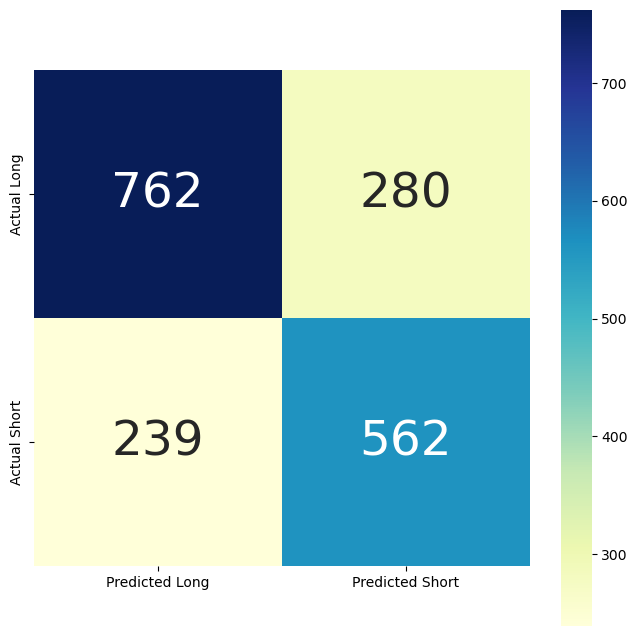

In [503]:
# İlk modelimizden elde ettiğimiz hata matrisi
cm1 = conf_matrix(y_test, y_pred_cv1)

In [504]:
X = df.sentence
y = df.idea

In [505]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [506]:
# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

,aamonkey,aamonkey payment,aapl,aapl ath,aapl spx,aav,aav eth,aav sol,abcd,abcd head,...,zoom short,zoom tree,zoom view,zoom way,zoom week,zoom wide,zoom young,zulkifli,zulkifli argu,zulkifli launch
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [507]:
Counter(y_resampled)

Counter({'Short': 2431, 'Long': 2431})

In [508]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_cv2, y_train)

In [509]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
lr.fit(X_resampled, y_resampled)
y_pred_cv2 = lr.predict(X_test_cv2)

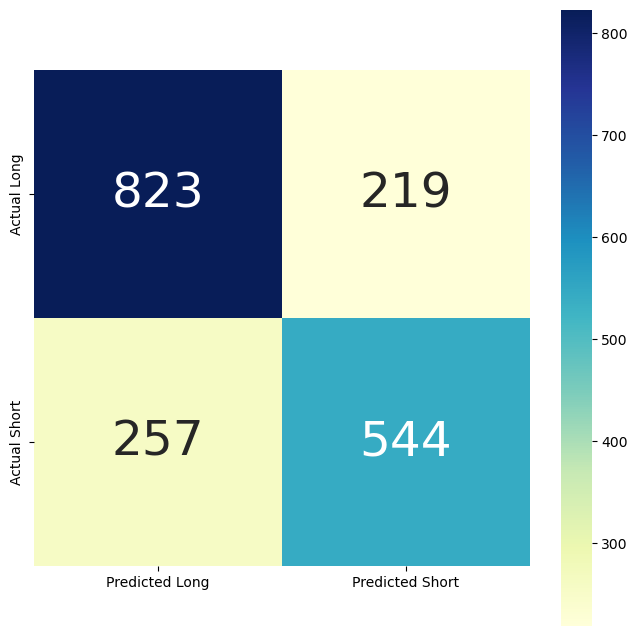

In [510]:
# İkinci modelimizden elde ettiğimiz hata matrisi
cm2 = conf_matrix(y_test, y_pred_cv2)

In [511]:
results = pd.DataFrame(list(zip(cm1,cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR(Word)-CV', 'LR(N-Grams)-CV']
results

,LR(Word)-CV,LR(N-Grams)-CV
Accuracy,0.718394,0.741725
Precision,0.667458,0.712975
Recall,0.701623,0.679151
F1 Score,0.684114,0.695652


## count sonrası random oversampling ve MultinomialNB algoritmasıyla modellerimizi eğitelim

# MultinomialNB & Kelime

In [512]:
X = df.sentence
y = df.idea

In [513]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [514]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()

,aamonkey,aapl,aav,abcd,abil,abit,abl,abroad,absenc,absolut,...,zhao,zig,zigzag,ziilllaatrad,zir,zlsma,zona,zone,zoom,zulkifli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [515]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_cv1, y_train)


In [516]:
Counter(y_resampled)

Counter({'Short': 2431, 'Long': 2431})

In [517]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()

In [518]:
mnb1.fit(X_resampled, y_resampled)
y_pred_cv1_mnb = mnb1.predict(X_test_cv1)

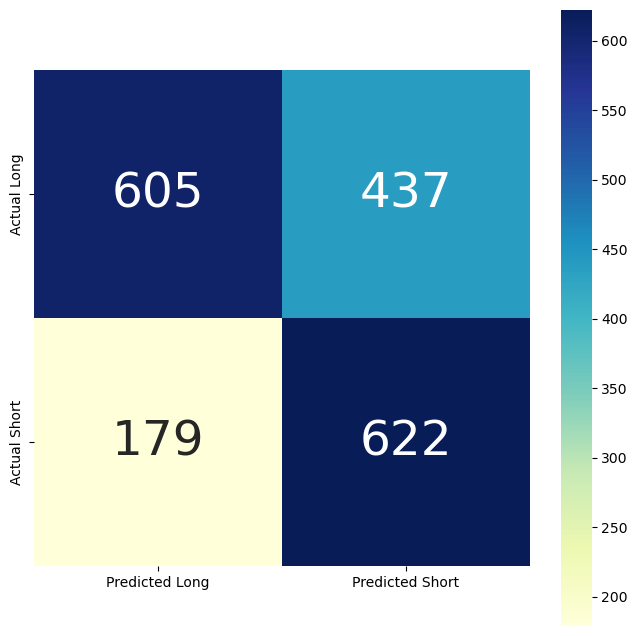

In [519]:
# MultinomialNB & Kelime
cm3 = conf_matrix(y_test, y_pred_cv1_mnb)

# MultinomialNB & 2'li N-Grams

In [520]:
X = df.sentence
y = df.idea

In [521]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [522]:
# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

,aamonkey,aamonkey payment,aapl,aapl ath,aapl spx,aav,aav eth,aav sol,abcd,abcd head,...,zoom short,zoom tree,zoom view,zoom way,zoom week,zoom wide,zoom young,zulkifli,zulkifli argu,zulkifli launch
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [523]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_cv2, y_train)

In [524]:
Counter(y_resampled)

Counter({'Short': 2431, 'Long': 2431})

In [525]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()

In [526]:
mnb2.fit(X_resampled, y_resampled)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

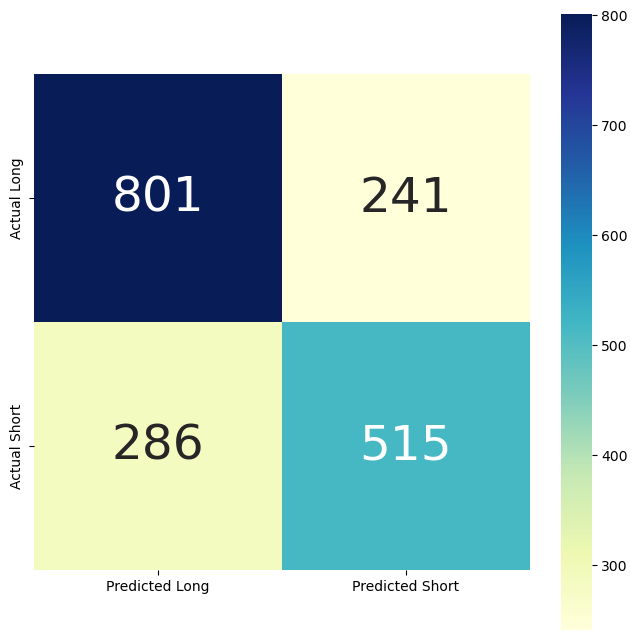

In [527]:
# MultinomialNB & 2'li N-Grams
cm4 = conf_matrix(y_test, y_pred_cv2_mnb)

# BernoulliNB & Kelime

In [528]:
X = df.sentence
y = df.idea

In [529]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [530]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()

,aamonkey,aapl,aav,abcd,abil,abit,abl,abroad,absenc,absolut,...,zhao,zig,zigzag,ziilllaatrad,zir,zlsma,zona,zone,zoom,zulkifli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [531]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_cv1, y_train)

In [532]:
# Ardından da BernoulliNB algoritmasıyla
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_resampled, y_resampled)
y_pred_cv1_bnb = bnb1.predict(X_test_cv1)


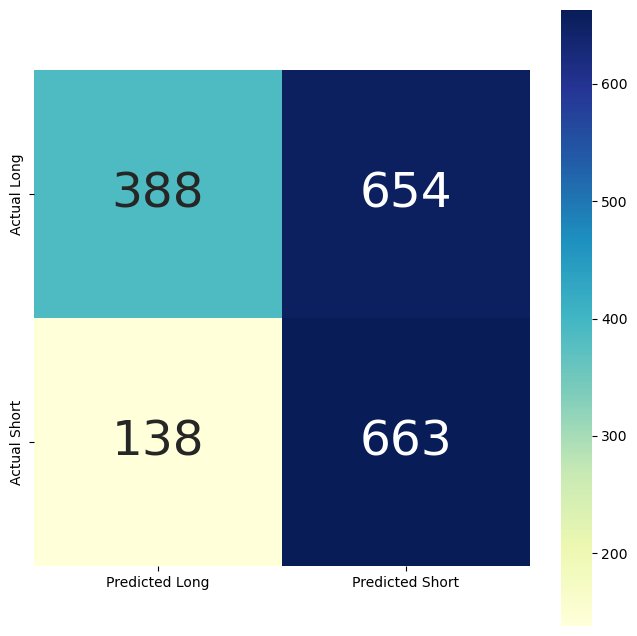

In [533]:
cm5 = conf_matrix(y_test, y_pred_cv1_bnb)

# BernoulliNB & 2'li N-Grams

In [534]:
X = df.sentence
y = df.idea

In [535]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [536]:
# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

,aamonkey,aamonkey payment,aapl,aapl ath,aapl spx,aav,aav eth,aav sol,abcd,abcd head,...,zoom short,zoom tree,zoom view,zoom way,zoom week,zoom wide,zoom young,zulkifli,zulkifli argu,zulkifli launch
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [537]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_cv2, y_train)

In [538]:
# Ardından da BernoulliNB algoritmasıyla
from sklearn.naive_bayes import BernoulliNB

bnb2 = BernoulliNB()
bnb2.fit(X_resampled, y_resampled)
y_pred_cv2_bnb = bnb2.predict(X_test_cv2)

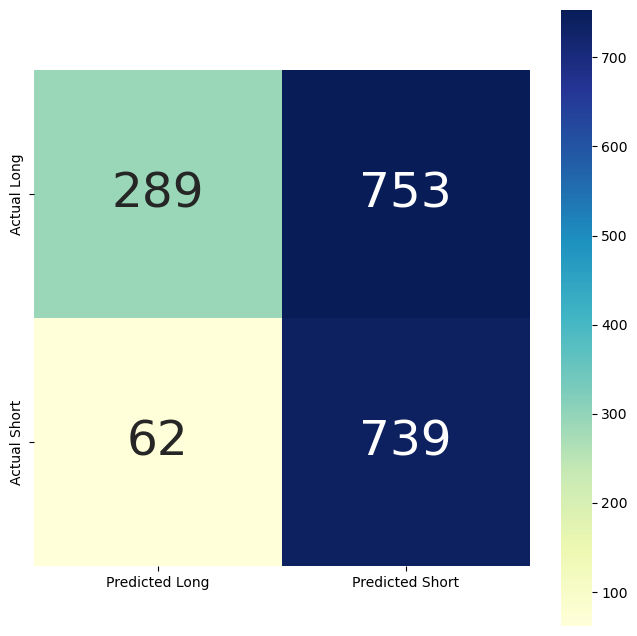

In [539]:
# BernoulliNB & 2'li N-Grams
cm6 = conf_matrix(y_test, y_pred_cv2_bnb)

In [540]:
results_nb = pd.DataFrame(list(zip(cm3, cm4, cm5, cm6)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['MNB(Word)-CV', 'MNB(N-Grams)-CV', 'BNB(Word)-CV', 'BNB(N-Grams)-CV']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV
Accuracy,0.718394,0.741725,0.665762,0.714053,0.570266,0.557786
Precision,0.667458,0.712975,0.587347,0.681217,0.503417,0.495308
Recall,0.701623,0.679151,0.776529,0.642946,0.827715,0.922597
F1 Score,0.684114,0.695652,0.668817,0.661529,0.626062,0.644570


## 4.2. TFIDF-Vectorizer ve sonrası random oversampling

# tfidf random oversamp ve # Logistic Regresyon & Kelime

In [541]:
X = df.sentence
y = df.idea


In [542]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [543]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head(25)

In [544]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf1 , y_train)

In [545]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_resampled, y_resampled)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)

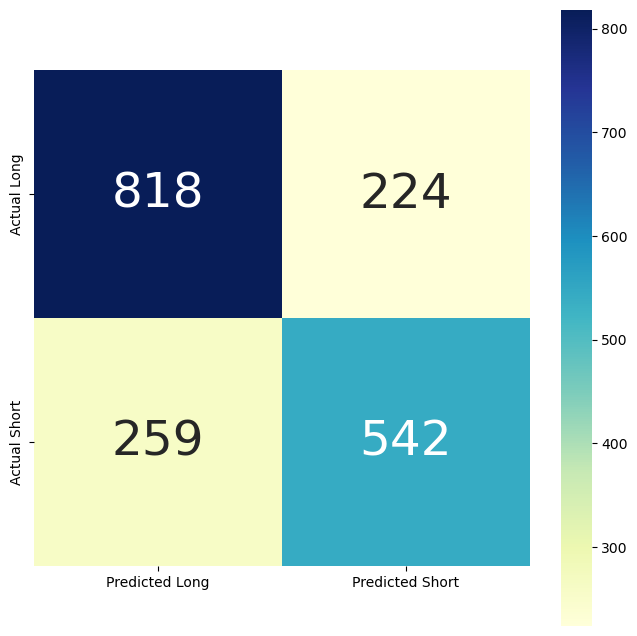

In [546]:
cm7 = conf_matrix(y_test, y_pred_tfidf1_lr)

# tfidf random oversamp ve  Logistic Regresyon & 2'li N-Grams

In [547]:
X = df.sentence
y = df.idea

In [548]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [549]:
tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head(25)

In [550]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf2 , y_train)

In [551]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_resampled, y_resampled)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)

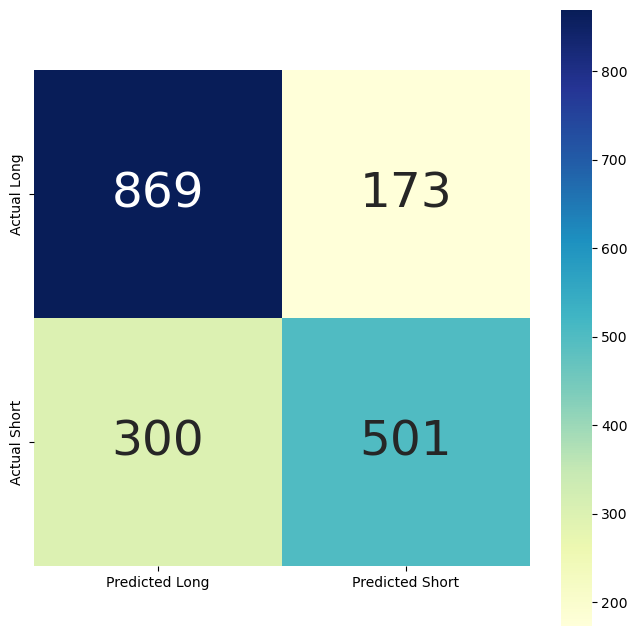

In [552]:
# Logistic Regresyon & 2'li N-Grams
cm8 = conf_matrix(y_test, y_pred_tfidf2_lr)

# # tfidf random oversamp ve  MultinomialNB & Kelime

In [553]:
X = df.sentence
y = df.idea

In [554]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [555]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head(25)

In [556]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf1 , y_train)

In [557]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_resampled,y_resampled)
y_pred_tfidf1_mnb = mnb1.predict(X_test_tfidf1)

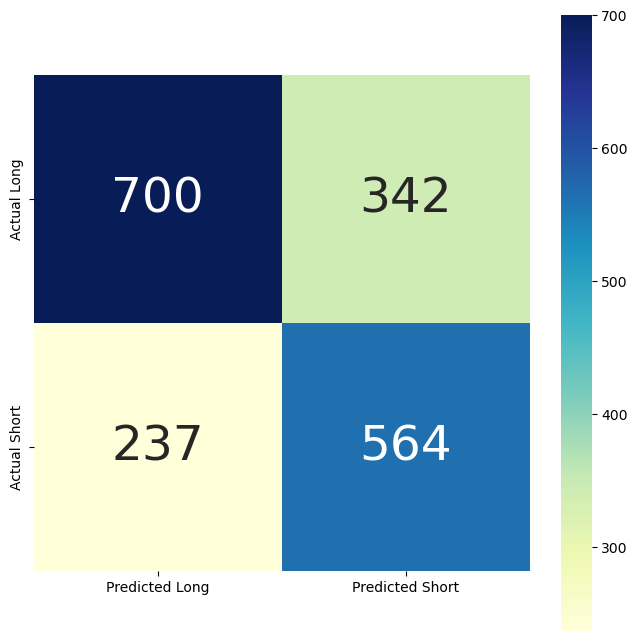

In [558]:
# MultinominalNB & Kelime
cm9 = conf_matrix(y_test, y_pred_tfidf1_mnb)

# # tfidf random oversamp ve  # MultinominalNB & 2'li N-Grams

In [559]:
X = df.sentence
y = df.idea

In [560]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [561]:
tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head(25)

In [562]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf2 , y_train)

In [563]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()
mnb2.fit(X_resampled,y_resampled)
y_pred_tfidf2_mnb = mnb2.predict(X_test_tfidf2)

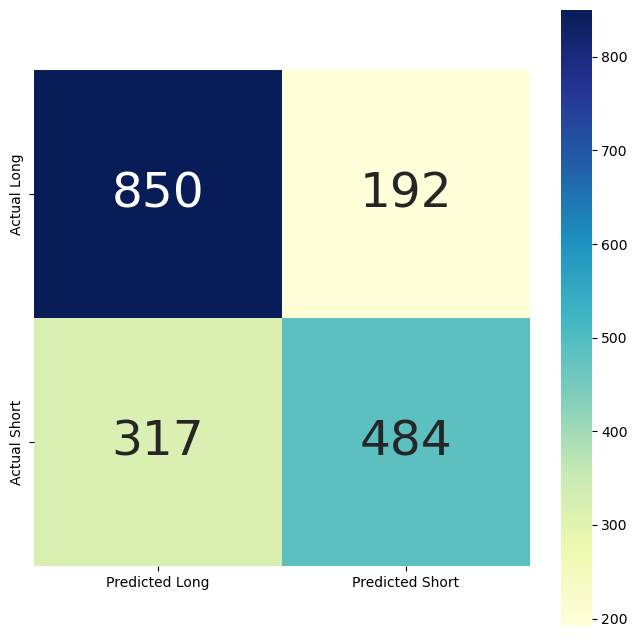

In [564]:
# MultinominalNB & 2'li N-Grams
cm10 = conf_matrix(y_test, y_pred_tfidf2_mnb)

# tfidf random oversam BernoulliNB & Kelime

In [565]:
X = df.sentence
y = df.idea

In [566]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [567]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head(25)

In [568]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf1 , y_train)

In [569]:
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_resampled,y_resampled)
y_pred_tfidf1_bnb = bnb1.predict(X_test_tfidf1 )

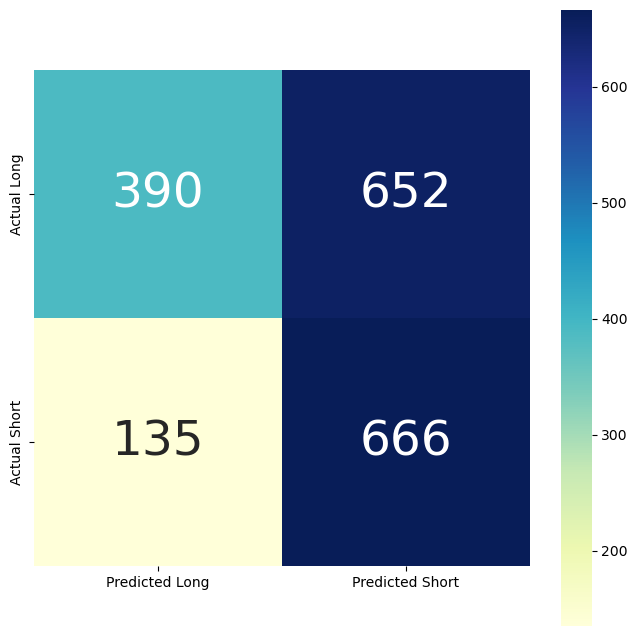

In [570]:
# BernoulliNB & Kelime
cm11 = conf_matrix(y_test, y_pred_tfidf1_bnb)

# tfidf random oversam # BernoulliNB & 2'li N-Grams

In [571]:
X = df.sentence
y = df.idea

In [572]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [573]:
tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head(25)

In [574]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf2 , y_train)

In [575]:
from sklearn.naive_bayes import BernoulliNB

bnb2 = BernoulliNB()
bnb2.fit(X_resampled,y_resampled)
y_pred_tfidf2_bnb = bnb2.predict(X_test_tfidf2)

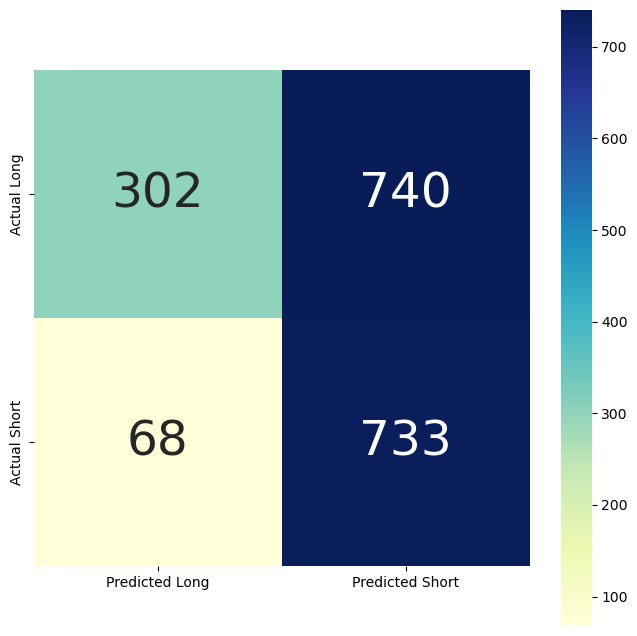

In [576]:
# BernoulliNB & 2'li N-Grams
cm12 = conf_matrix(y_test, y_pred_tfidf2_bnb)

In [577]:
results_tf = pd.DataFrame(list(zip(cm7, cm8, cm9, cm10, cm11, cm12)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR(Word)-TFIDF', 'LR(N-Grams)-TFIDF', 'MNB(Word)-TFIDF', 
                      'MNB(N-Grams)-TFIDF', 'BNB(Word)-TFIDF', 'BNB(N-Grams)-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV,LR(Word)-TFIDF,LR(N-Grams)-TFIDF,MNB(Word)-TFIDF,MNB(N-Grams)-TFIDF,BNB(Word)-TFIDF,BNB(N-Grams)-TFIDF
Accuracy,0.718394,0.741725,0.665762,0.714053,0.570266,0.557786,0.737927,0.743353,0.685838,0.723820,0.572979,0.561584
Precision,0.667458,0.712975,0.587347,0.681217,0.503417,0.495308,0.707572,0.743323,0.622517,0.715976,0.505311,0.497624
Recall,0.701623,0.679151,0.776529,0.642946,0.827715,0.922597,0.676654,0.625468,0.704120,0.604245,0.831461,0.915106
F1 Score,0.684114,0.695652,0.668817,0.661529,0.626062,0.644570,0.691768,0.679322,0.660808,0.655383,0.628598,0.644679


## şimdi smote oversampling uygulayalım

## countvectorizer ve sonrasında smote oversampling

## counteizer smote oversampling lineer regresyon modelleri

# counteizer smote oversampling linner kelime toke

In [374]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()


In [375]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_cv1, y_train)

C:\Users\selcu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


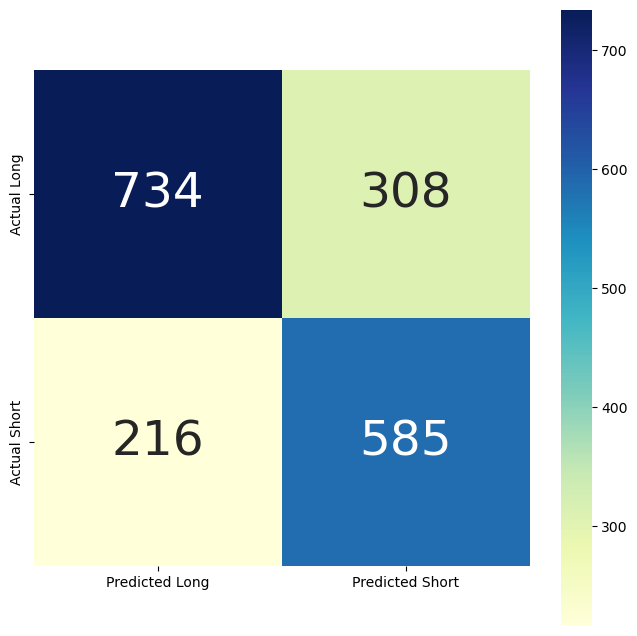

In [376]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)

# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_smoted, y_smoted)
y_pred_cv1 = lr.predict(X_test_cv1)

# İlk modelimizden elde ettiğimiz hata matrisi
cm1 = conf_matrix(y_test, y_pred_cv1)

## count smote  linner reg ngram

In [377]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)
#pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

In [378]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_cv2, y_train)



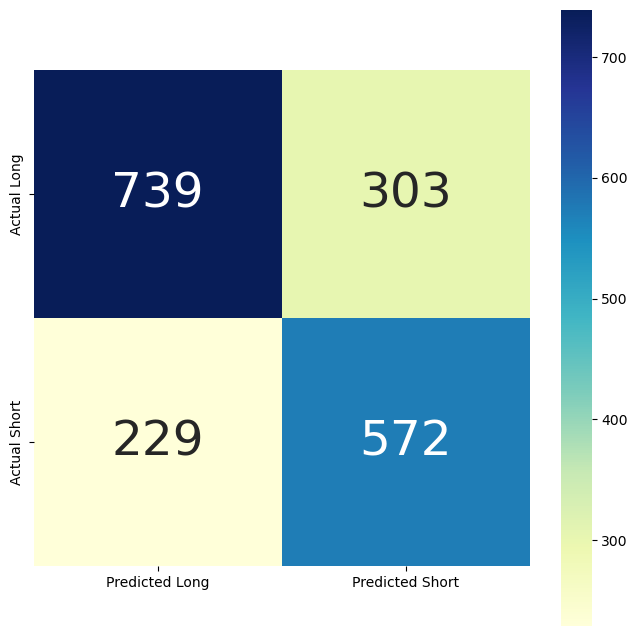

In [379]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)

# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_smoted, y_smoted)
y_pred_cv2 = lr.predict(X_test_cv2)

# İlk modelimizden elde ettiğimiz hata matrisi
cm2 = conf_matrix(y_test, y_pred_cv2)

In [380]:
results = pd.DataFrame(list(zip(cm1,cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR(Word)-CV', 'LR(N-Grams)-CV']
results

,LR(Word)-CV,LR(N-Grams)-CV
Accuracy,0.715681,0.711340
Precision,0.655095,0.653714
Recall,0.730337,0.714107
F1 Score,0.690673,0.682578


## count smote  MultinomialNB kelime token

In [381]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()

In [382]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_cv1, y_train)

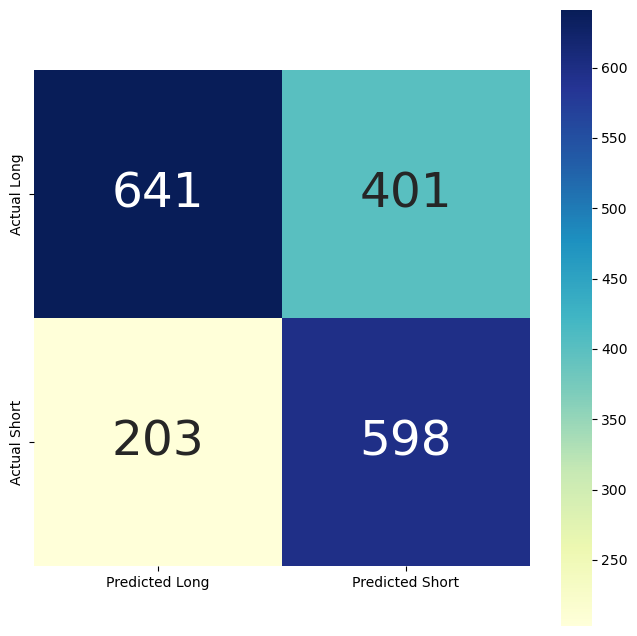

In [383]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_smoted, y_smoted)
y_pred_cv1_mnb = mnb1.predict(X_test_cv1)

# MultinomialNB & Kelime
cm3 = conf_matrix(y_test, y_pred_cv1_mnb)

## count smote  MultinomialNB ngram token

In [384]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)
#pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

In [385]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_cv2, y_train)

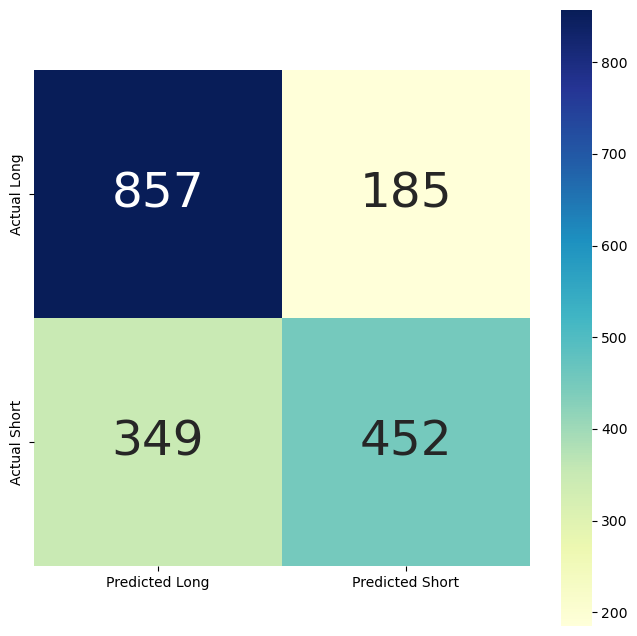

In [386]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()
mnb2.fit(X_smoted, y_smoted)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

# MultinomialNB & Kelime
cm4 = conf_matrix(y_test, y_pred_cv2_mnb)

## count smote bernouli kelime

In [387]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()

In [388]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_cv1, y_train)

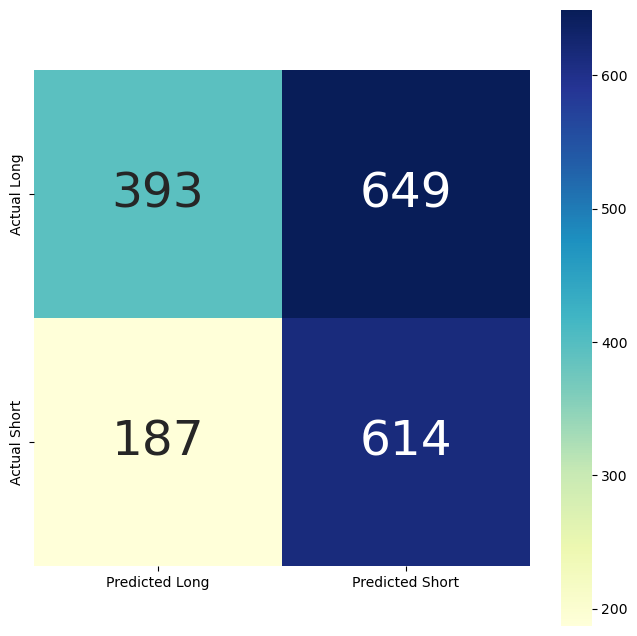

In [389]:
# Ardından da BernoulliNB algoritmasıyla
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_smoted, y_smoted)
y_pred_cv1_bnb = bnb1.predict(X_test_cv1)
cm5 = conf_matrix(y_test, y_pred_cv1_bnb)

## count smote bernouli ngram

In [390]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)
#pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

In [391]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_cv2, y_train)

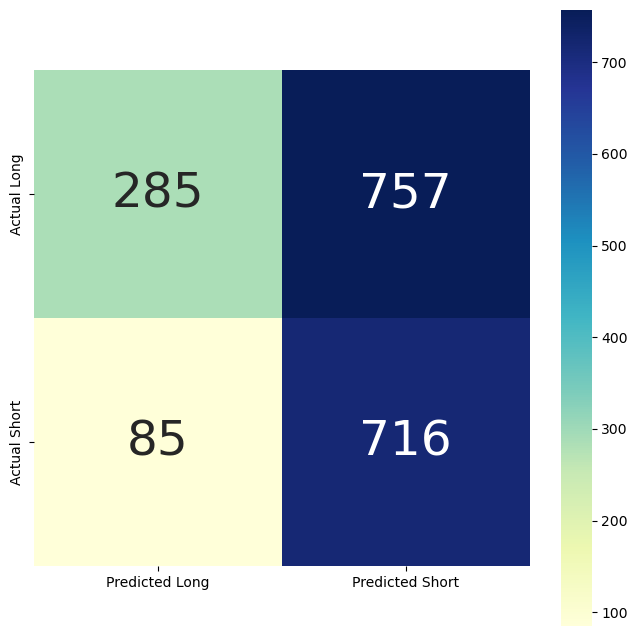

In [392]:
from sklearn.naive_bayes import BernoulliNB

bnb2 = BernoulliNB()
bnb2.fit(X_smoted, y_smoted)
y_pred_cv2_bnb = bnb2.predict(X_test_cv2)
cm6 = conf_matrix(y_test, y_pred_cv2_bnb)

In [393]:
results_nb = pd.DataFrame(list(zip(cm3, cm4, cm5, cm6)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['MNB(Word)-CV', 'MNB(N-Grams)-CV', 'BNB(Word)-CV', 'BNB(N-Grams)-CV']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV
Accuracy,0.715681,0.711340,0.672273,0.710255,0.546392,0.543136
Precision,0.655095,0.653714,0.598599,0.709576,0.486144,0.486083
Recall,0.730337,0.714107,0.746567,0.564295,0.766542,0.893883
F1 Score,0.690673,0.682578,0.664444,0.628651,0.594961,0.629727


### tfidf smote lineer reg kelime

In [394]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head()



In [395]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_tfidf1, y_train)

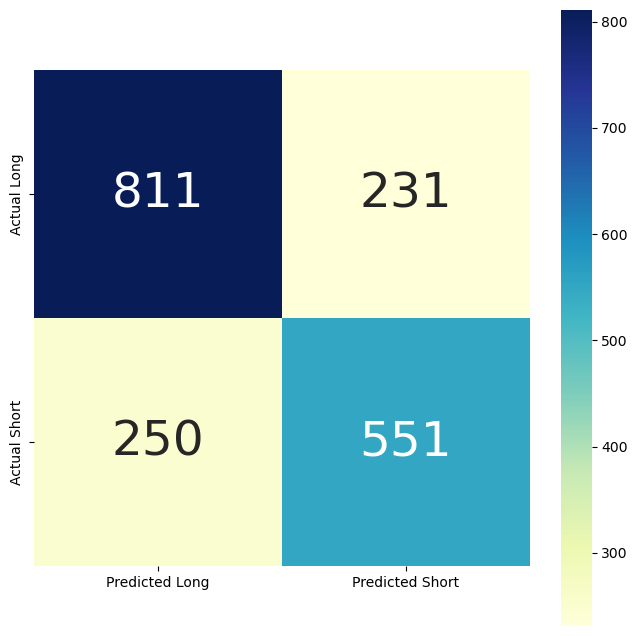

In [396]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_smoted, y_smoted)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)

cm7 = conf_matrix(y_test, y_pred_tfidf1_lr)

### tfidf smote lineer reg ngram 

In [397]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head()


In [398]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_tfidf2, y_train)

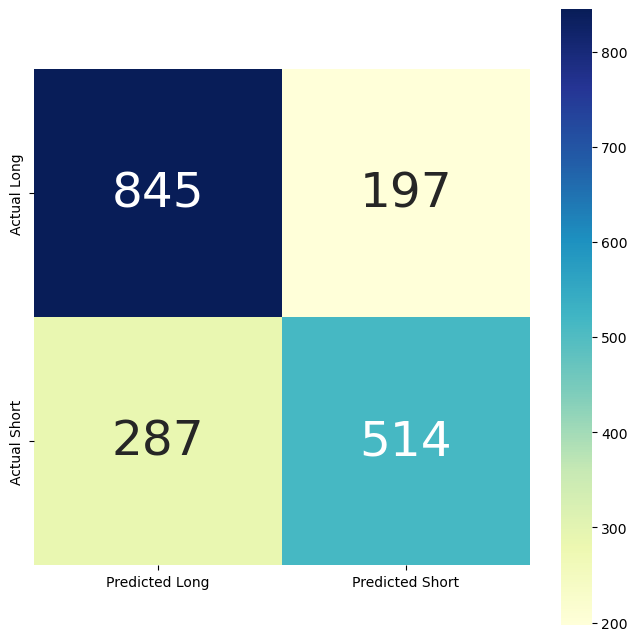

In [399]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_smoted, y_smoted)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)

cm8 = conf_matrix(y_test, y_pred_tfidf2_lr)

## ttfidf smote  MultinomialNB kelime token

In [400]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head()


In [401]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_tfidf1, y_train)

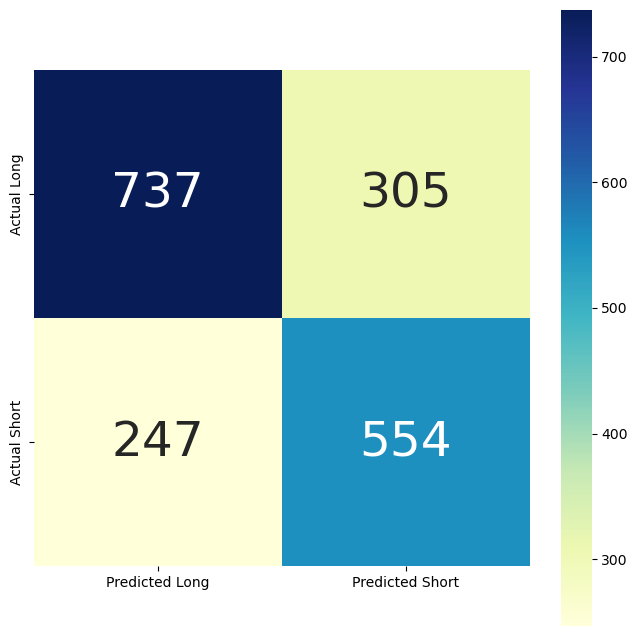

In [402]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_smoted,y_smoted)
y_pred_tfidf1_mnb = mnb1.predict(X_test_tfidf1)

cm9 = conf_matrix(y_test, y_pred_tfidf1_mnb)

## ttfidf smote  MultinomialNB ngram token

In [403]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head()

In [404]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_tfidf2, y_train)

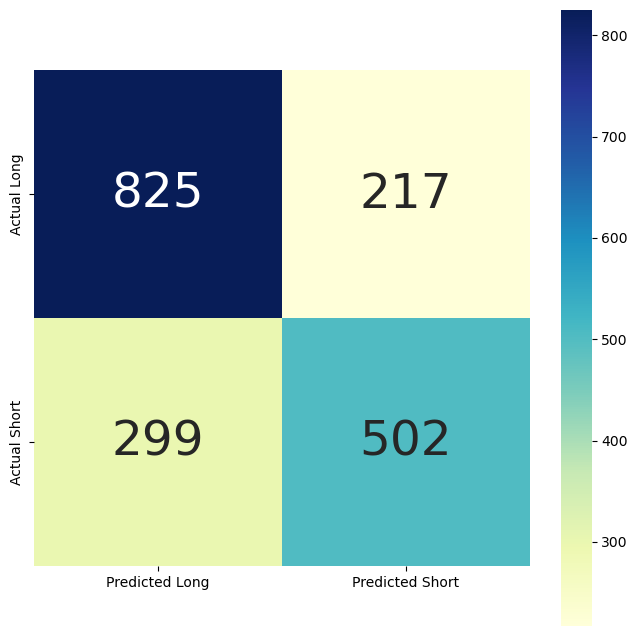

In [405]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()
mnb2.fit(X_smoted,y_smoted)
y_pred_tfidf2_mnb = mnb2.predict(X_test_tfidf2)

cm10 = conf_matrix(y_test, y_pred_tfidf2_mnb)

## ttfidf smote  bernoullı kelime token

In [406]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head()





In [407]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_tfidf1, y_train)

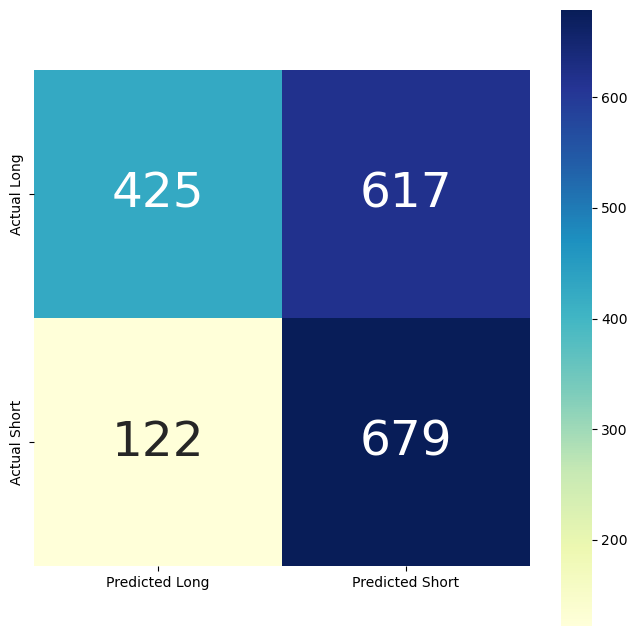

In [408]:
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_smoted,y_smoted)
y_pred_tfidf1_bnb = bnb1.predict(X_test_tfidf1)

# BernoulliNB & Kelime
cm11 = conf_matrix(y_test, y_pred_tfidf1_bnb)

## ttfidf smote  bernoullı ngram token

In [409]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head()

In [410]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train_tfidf2, y_train)

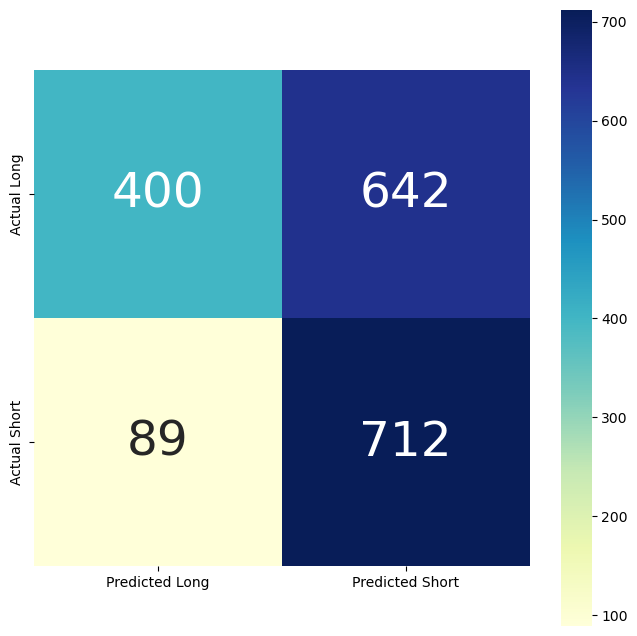

In [411]:
from sklearn.naive_bayes import BernoulliNB

bnb2 = BernoulliNB()
bnb2.fit(X_smoted,y_smoted)
y_pred_tfidf2_bnb = bnb2.predict(X_test_tfidf2)

# BernoulliNB & Kelime
cm12 = conf_matrix(y_test, y_pred_tfidf2_bnb)

In [412]:
results_tf = pd.DataFrame(list(zip(cm7, cm8, cm9, cm10, cm11, cm12)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR(Word)-TFIDF', 'LR(N-Grams)-TFIDF', 'MNB(Word)-TFIDF', 
                      'MNB(N-Grams)-TFIDF', 'BNB(Word)-TFIDF', 'BNB(N-Grams)-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV,LR(Word)-TFIDF,LR(N-Grams)-TFIDF,MNB(Word)-TFIDF,MNB(N-Grams)-TFIDF,BNB(Word)-TFIDF,BNB(N-Grams)-TFIDF
Accuracy,0.715681,0.711340,0.672273,0.710255,0.546392,0.543136,0.739012,0.737385,0.700488,0.720022,0.599023,0.603364
Precision,0.655095,0.653714,0.598599,0.709576,0.486144,0.486083,0.704604,0.722925,0.644936,0.698192,0.523920,0.525849
Recall,0.730337,0.714107,0.746567,0.564295,0.766542,0.893883,0.687890,0.641698,0.691635,0.626717,0.847690,0.888889
F1 Score,0.690673,0.682578,0.664444,0.628651,0.594961,0.629727,0.696147,0.679894,0.667470,0.660526,0.647592,0.660789


## şimdi  ADASYN (Adaptive Synthetic Oversampling) uygulayalım


## count adasyn lineer reg kelime token

In [413]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()


In [414]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_cv1, y_train)

C:\Users\selcu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


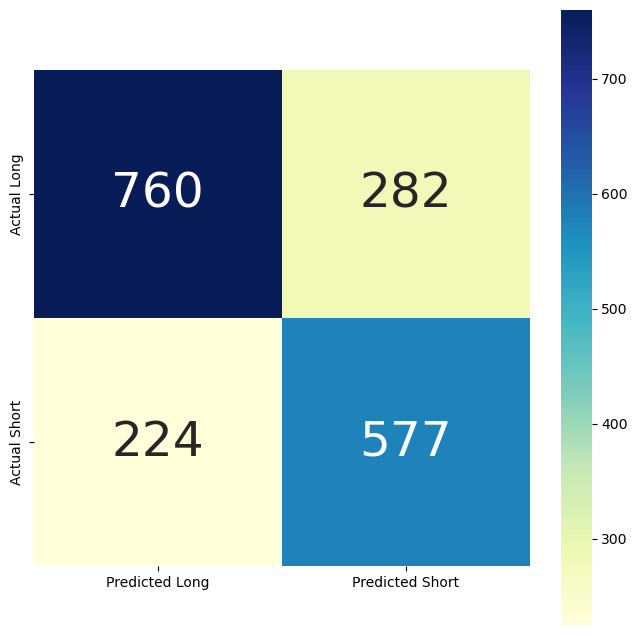

In [415]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)

# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_adasyn, y_adasyn)
y_pred_cv1 = lr.predict(X_test_cv1)

# İlk modelimizden elde ettiğimiz hata matrisi
cm1 = conf_matrix(y_test, y_pred_cv1)

## count adasyn lineer reg ngram token

In [416]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)
#pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()


In [417]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_cv2, y_train)

ValueError: No samples will be generated with the provided ratio settings.

In [418]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)

# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_adasyn, y_adasyn)
y_pred_cv2 = lr.predict(X_test_cv2)

# İlk modelimizden elde ettiğimiz hata matrisi
cm2 = conf_matrix(y_test, y_pred_cv2)

C:\Users\selcu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 114422 features, but LogisticRegression is expecting 7307 features as input.

In [419]:
results = pd.DataFrame(list(zip(cm1,cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR(Word)-CV', 'LR(N-Grams)-CV']
results

,LR(Word)-CV,LR(N-Grams)-CV
Accuracy,0.725448,0.711340
Precision,0.671711,0.653714
Recall,0.720350,0.714107
F1 Score,0.695181,0.682578


## count adasyn multinativebyes kelime token

In [420]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()


In [421]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_cv1, y_train)

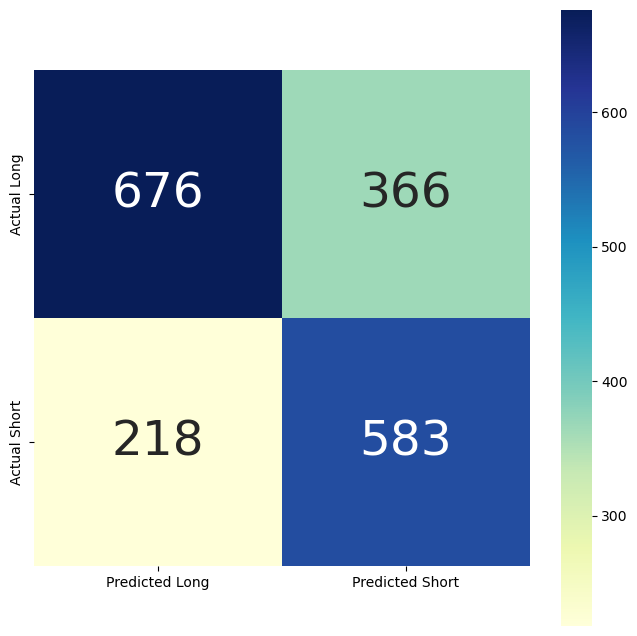

In [422]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_adasyn, y_adasyn)
y_pred_cv1_mnb = mnb1.predict(X_test_cv1)

# MultinomialNB & Kelime
cm3 = conf_matrix(y_test, y_pred_cv1_mnb)

## count adasyn multinativebyes ngram token

In [423]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)
#pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

In [424]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_cv2, y_train)

ValueError: No samples will be generated with the provided ratio settings.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()
mnb2.fit(X_adasyn, y_adasyn)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

# MultinomialNB & Kelime
cm4 = conf_matrix(y_test, y_pred_cv2_mnb)

## count adasyn bernoulli kelime token

In [ ]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()


In [ ]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_cv1, y_train)

In [ ]:
# Ardından da BernoulliNB algoritmasıyla
from sklearn.naive_bayes import BernoulliNB
bnb1 = BernoulliNB()
bnb1.fit(X_adasyn, y_adasyn)
y_pred_cv1_bnb = bnb1.predict(X_test_cv1)
cm5 = conf_matrix(y_test, y_pred_cv1_bnb)

## count adasyn bernoulli ngram token

In [425]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)
#pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()


In [426]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_cv2, y_train)

ValueError: No samples will be generated with the provided ratio settings.

In [ ]:
# Ardından da BernoulliNB algoritmasıyla
from sklearn.naive_bayes import BernoulliNB
bnb2 = BernoulliNB()
bnb2.fit(X_adasyn, y_adasyn)
y_pred_cv2_bnb = bnb2.predict(X_test_cv2)
cm6 = conf_matrix(y_test, y_pred_cv2_bnb)

In [ ]:
results_nb = pd.DataFrame(list(zip(cm3, cm4, cm5, cm6)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['MNB(Word)-CV', 'MNB(N-Grams)-CV', 'BNB(Word)-CV', 'BNB(N-Grams)-CV']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

## tfidf adasyn lineer reg kelime token

In [427]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head()


In [428]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_tfidf1 , y_train)

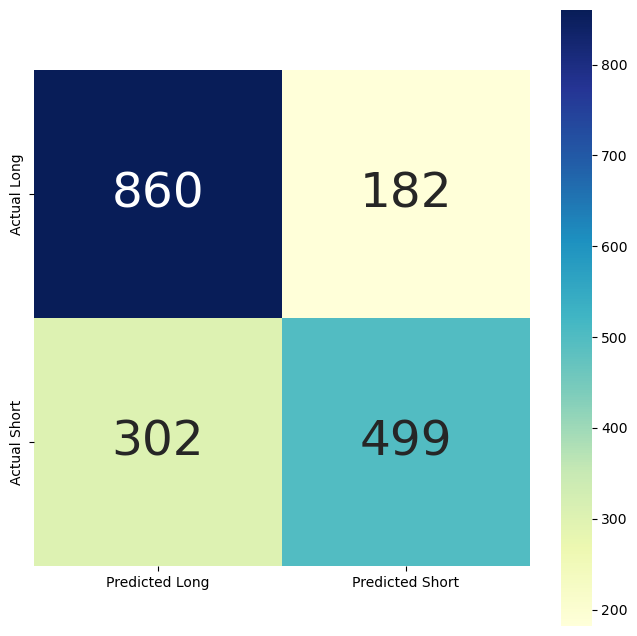

In [429]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_adasyn, y_adasyn)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)

cm7 = conf_matrix(y_test, y_pred_tfidf1_lr)

## tfdif adasyn lineer reg  ngram

In [430]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)


In [431]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_tfidf2 , y_train)

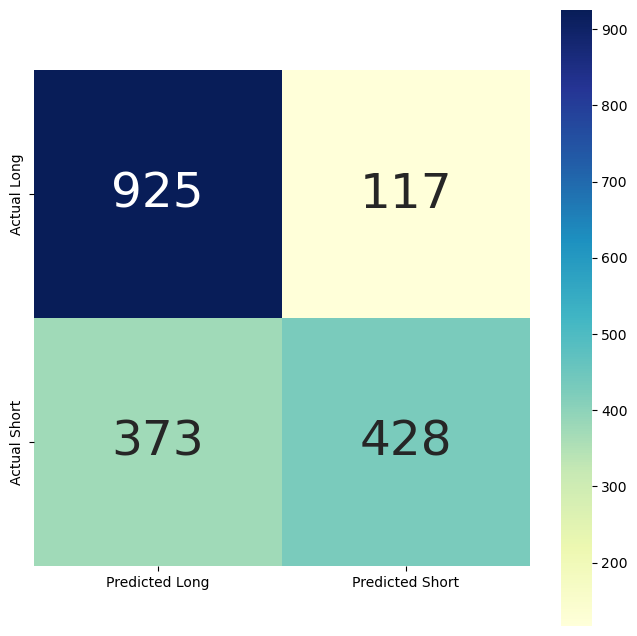

In [432]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_adasyn, y_adasyn)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)

cm8 = conf_matrix(y_test, y_pred_tfidf2_lr)

## tfidf adasyn multinative kelime token

In [433]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head()


In [434]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_tfidf1 , y_train)

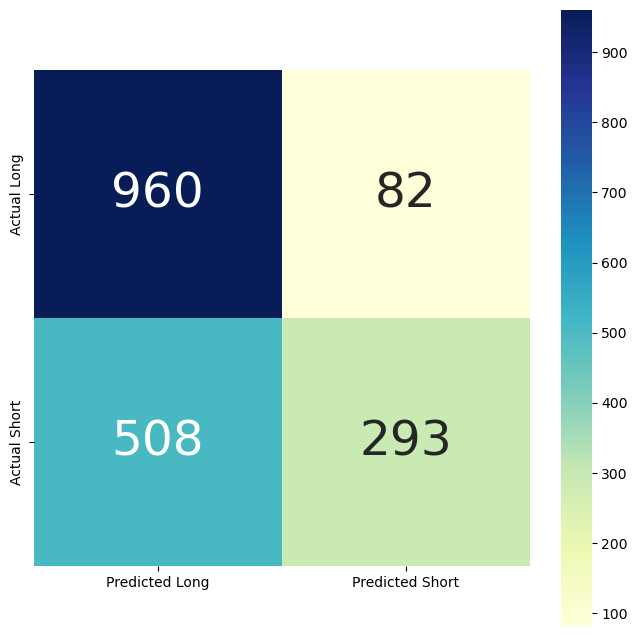

In [435]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_adasyn,y_adasyn)
y_pred_tfidf1_mnb = mnb1.predict(X_test_tfidf1)

cm9 = conf_matrix(y_test, y_pred_tfidf1_mnb)

## tfidf adasyn multinative ngram token

In [436]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head()


In [437]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_tfidf2 , y_train)

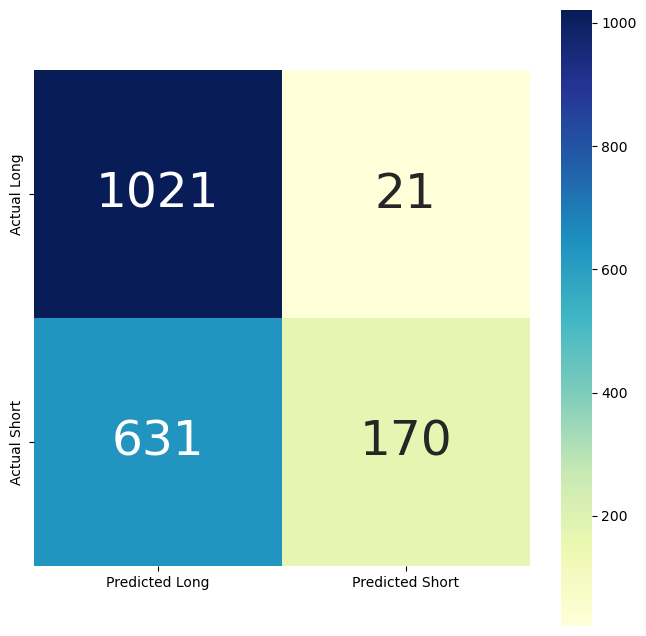

In [438]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()
mnb2.fit(X_adasyn,y_adasyn)
y_pred_tfidf2_mnb = mnb2.predict(X_test_tfidf2)

cm10 = conf_matrix(y_test, y_pred_tfidf2_mnb)

## tfidf adasyn bernoulli kelime token

In [439]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head()


In [440]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_tfidf1 , y_train)

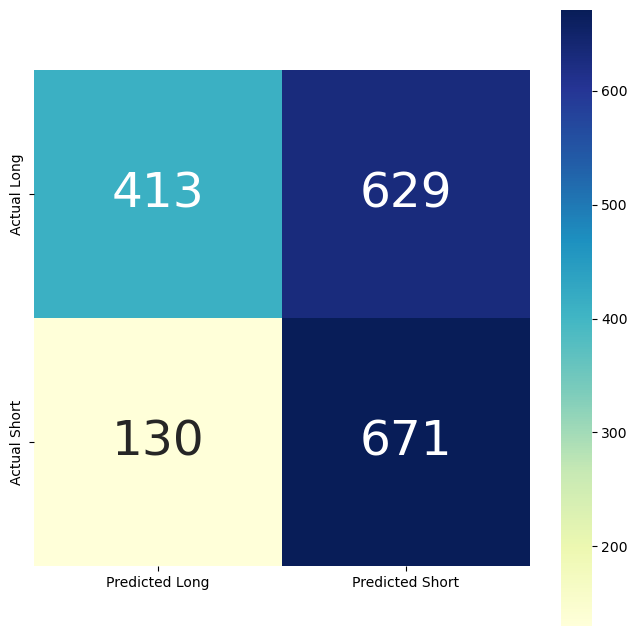

In [441]:
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_adasyn,y_adasyn)
y_pred_tfidf1_bnb = bnb1.predict(X_test_tfidf1)

# BernoulliNB & Kelime
cm11 = conf_matrix(y_test, y_pred_tfidf1_bnb)

## tfidf adasyn bernoulli ngram token

In [442]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head()


In [443]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_tfidf2 , y_train)

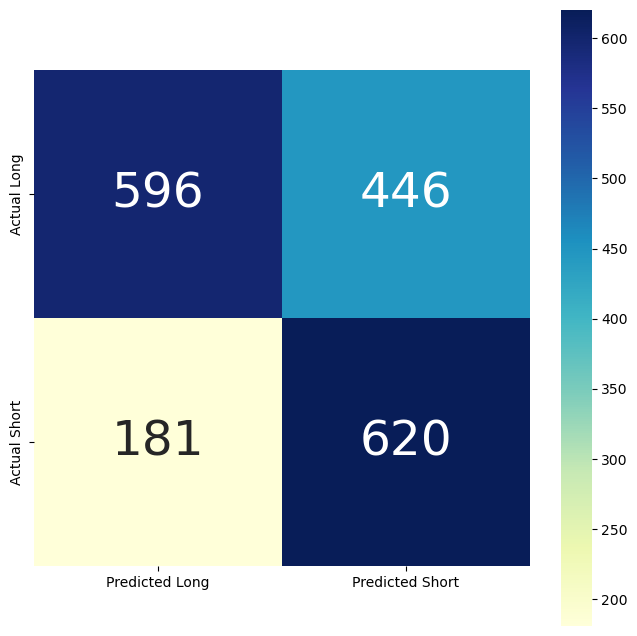

In [444]:
from sklearn.naive_bayes import BernoulliNB

bnb2 = BernoulliNB()
bnb2.fit(X_adasyn,y_adasyn)
y_pred_tfidf2_bnb = bnb2.predict(X_test_tfidf2)

# BernoulliNB & Kelime
cm12 = conf_matrix(y_test, y_pred_tfidf2_bnb)

In [445]:
results_tf = pd.DataFrame(list(zip(cm7, cm8, cm9, cm10, cm11, cm12)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR(Word)-TFIDF', 'LR(N-Grams)-TFIDF', 'MNB(Word)-TFIDF', 
                      'MNB(N-Grams)-TFIDF', 'BNB(Word)-TFIDF', 'BNB(N-Grams)-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,LR(Word)-TFIDF,LR(N-Grams)-TFIDF,MNB(Word)-TFIDF,MNB(N-Grams)-TFIDF,BNB(Word)-TFIDF,BNB(N-Grams)-TFIDF
Accuracy,0.725448,0.711340,0.737385,0.734129,0.679870,0.646229,0.588171,0.659794
Precision,0.671711,0.653714,0.732746,0.785321,0.781333,0.890052,0.516154,0.581614
Recall,0.720350,0.714107,0.622971,0.534332,0.365793,0.212235,0.837703,0.774032
F1 Score,0.695181,0.682578,0.673414,0.635958,0.498299,0.342742,0.638743,0.664167


##  Borderline-SMOTE tekniği ile oversampling

## countvectorizer borderline smote lineer regresyon ve kelime token

In [446]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()


In [447]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_cv1, y_train)

C:\Users\selcu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


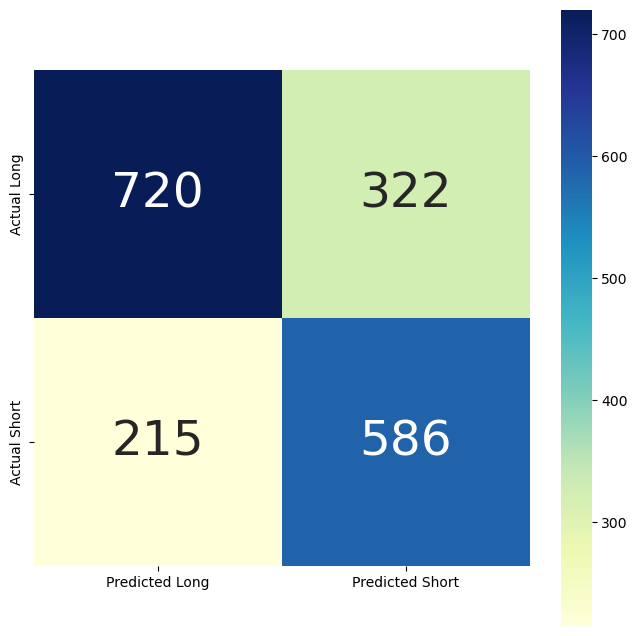

In [448]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)

# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_blsmote, y_blsmote)
y_pred_cv1 = lr.predict(X_test_cv1)

# İlk modelimizden elde ettiğimiz hata matrisi
cm1 = conf_matrix(y_test, y_pred_cv1)

## countvectorizer borderline smote lineer regresyon ve ngram token

In [449]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)
#pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

In [450]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_cv2, y_train)

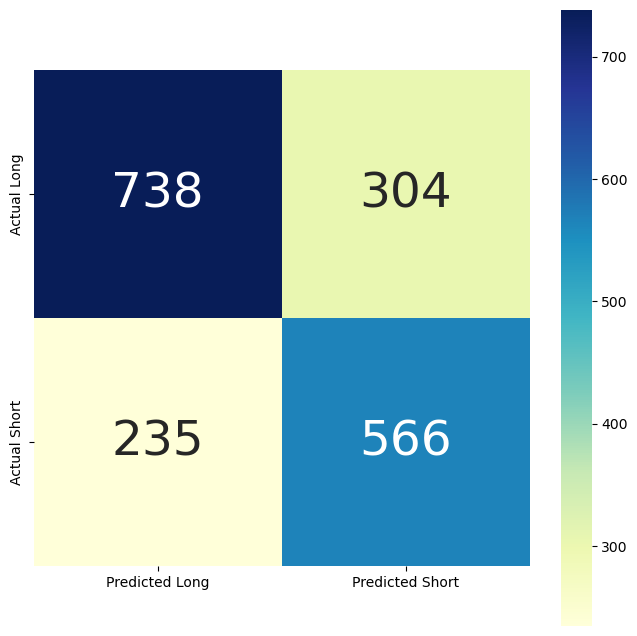

In [451]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)

# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_blsmote, y_blsmote)
y_pred_cv2 = lr.predict(X_test_cv2)

# İlk modelimizden elde ettiğimiz hata matrisi
cm2 = conf_matrix(y_test, y_pred_cv2)

In [452]:
results = pd.DataFrame(list(zip(cm1,cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR(Word)-CV', 'LR(N-Grams)-CV']
results

,LR(Word)-CV,LR(N-Grams)-CV
Accuracy,0.708627,0.707542
Precision,0.645374,0.650575
Recall,0.731586,0.706617
F1 Score,0.685781,0.677439


## countvectorizer borderline smote multinbyes ve kelime token

In [453]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()


In [454]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_cv1, y_train)

C:\Users\selcu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


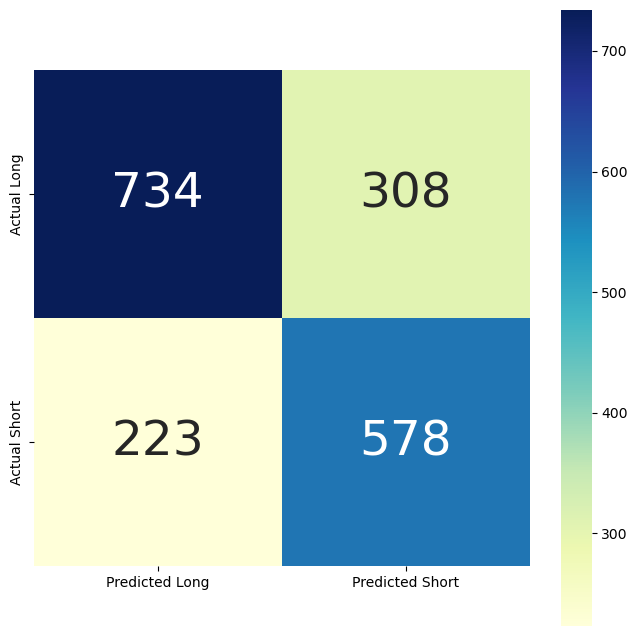

In [455]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)

# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_blsmote, y_blsmote)
y_pred_cv1 = lr.predict(X_test_cv1)

# İlk modelimizden elde ettiğimiz hata matrisi
cm3 = conf_matrix(y_test, y_pred_cv1)

## countvectorizer borderline smote multinbyes ve ngram token

In [456]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)
#pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

In [457]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_cv2, y_train)

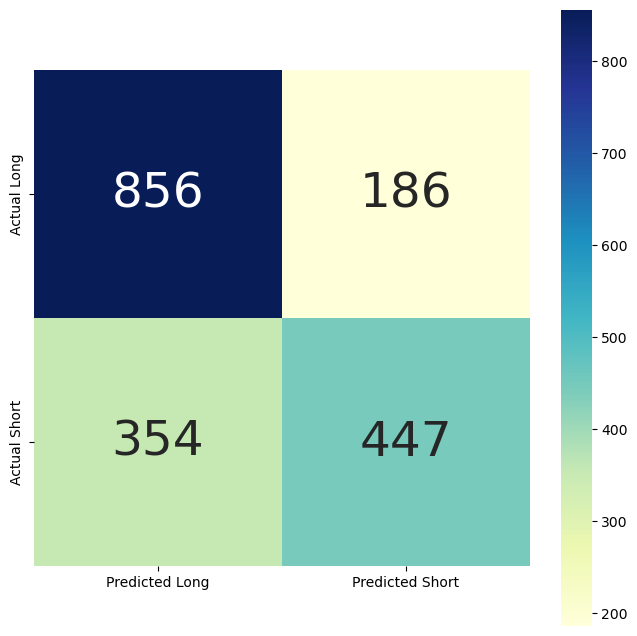

In [458]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()
mnb2.fit(X_blsmote, y_blsmote)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

# MultinomialNB & Kelime
cm4 = conf_matrix(y_test, y_pred_cv2_mnb)

## countvectorizer borderline smote bernoulli ve kelime token

In [459]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()

In [460]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_cv1, y_train)

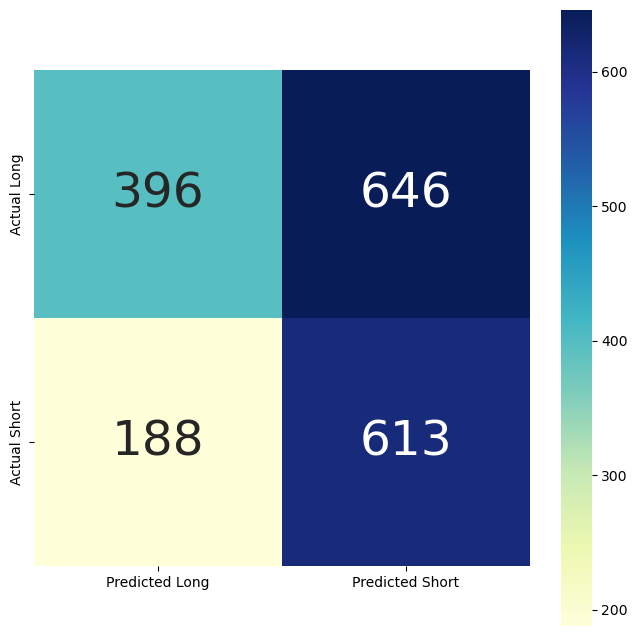

In [461]:
# Ardından da BernoulliNB algoritmasıyla
from sklearn.naive_bayes import BernoulliNB
bnb1 = BernoulliNB()
bnb1.fit(X_blsmote, y_blsmote)
y_pred_cv1_bnb = bnb1.predict(X_test_cv1)
cm5 = conf_matrix(y_test, y_pred_cv1_bnb)

## countvectorizer borderline smote bernoulli ve ngram token

In [462]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)
#pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

In [463]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_cv2, y_train)

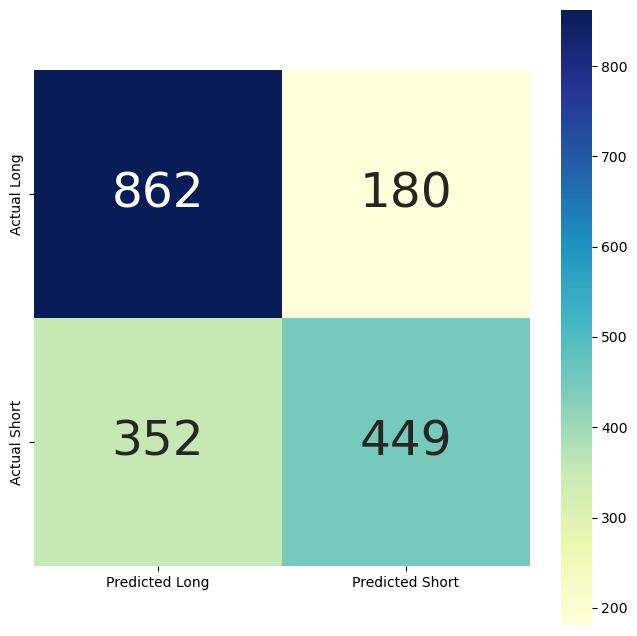

In [464]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()
mnb2.fit(X_blsmote, y_blsmote)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

# MultinomialNB & Kelime
cm6 = conf_matrix(y_test, y_pred_cv2_mnb)

In [465]:
results_nb = pd.DataFrame(list(zip(cm3, cm4, cm5, cm6)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['MNB(Word)-CV', 'MNB(N-Grams)-CV', 'BNB(Word)-CV', 'BNB(N-Grams)-CV']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV
Accuracy,0.708627,0.707542,0.711883,0.706999,0.547477,0.711340
Precision,0.645374,0.650575,0.652370,0.706161,0.486894,0.713831
Recall,0.731586,0.706617,0.721598,0.558052,0.765293,0.560549
F1 Score,0.685781,0.677439,0.685240,0.623431,0.595146,0.627972


## tfidf borderline smote lineer reg ve kelime token

In [466]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head()


In [467]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_tfidf1, y_train)

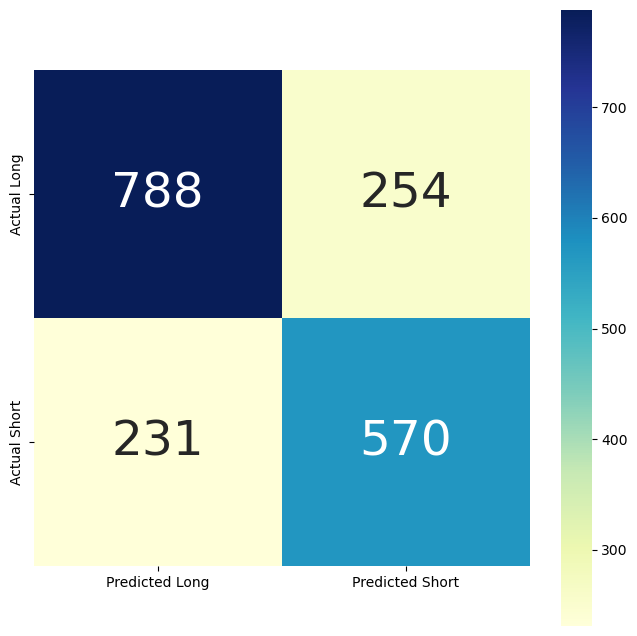

In [468]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_blsmote, y_blsmote)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)

cm7 = conf_matrix(y_test, y_pred_tfidf1_lr)

## tfidf borderline smote lineer reg ve ngram token

In [469]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head()

In [470]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_tfidf2, y_train)

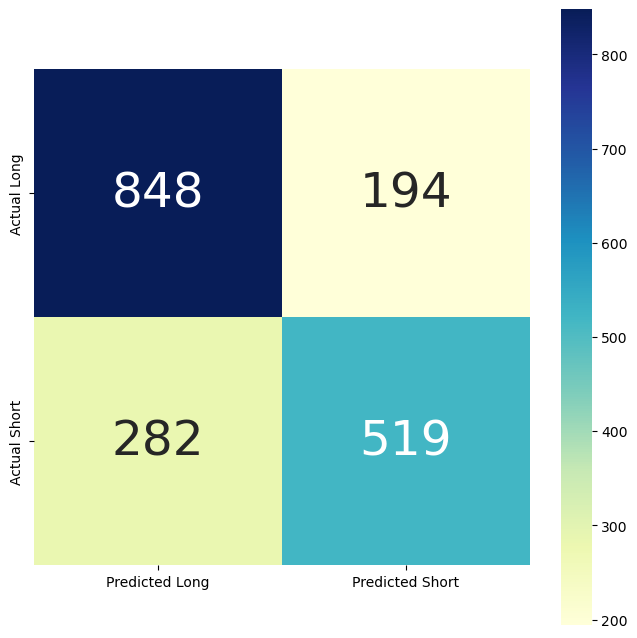

In [471]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100)
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_blsmote, y_blsmote)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)

cm8 = conf_matrix(y_test, y_pred_tfidf2_lr)

## tfidf borderline smote multibyes ve kelime token

In [472]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head()

In [473]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_tfidf1, y_train)

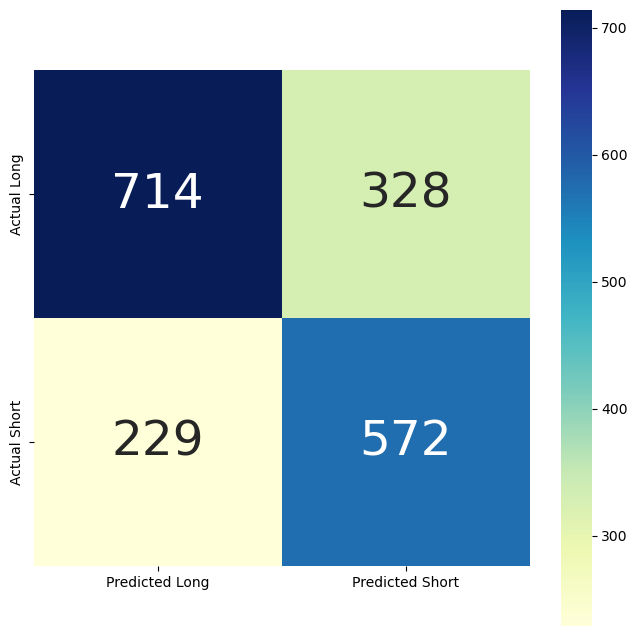

In [474]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_blsmote,y_blsmote)
y_pred_tfidf1_mnb = mnb1.predict(X_test_tfidf1)

cm9 = conf_matrix(y_test, y_pred_tfidf1_mnb)

## tfidf borderline smote multibyes ve ngram token

In [475]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head()

In [476]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_tfidf2, y_train)

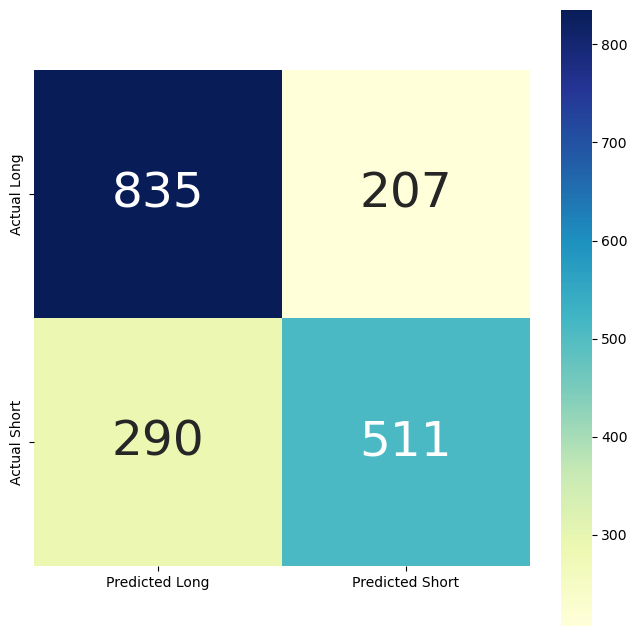

In [477]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()
mnb2.fit(X_blsmote,y_blsmote)
y_pred_tfidf2_mnb = mnb2.predict(X_test_tfidf2)

cm10 = conf_matrix(y_test, y_pred_tfidf2_mnb)

## tfidf borderline smote bernoulli ve kelime token

In [478]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)
#pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names_out()).head()

In [479]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_tfidf1, y_train)

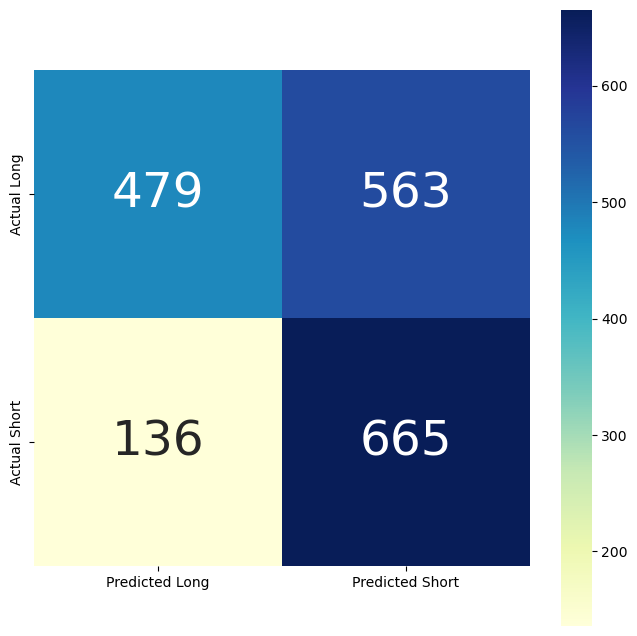

In [480]:
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_blsmote,y_blsmote)
y_pred_tfidf1_bnb = bnb1.predict(X_test_tfidf1)

# BernoulliNB & Kelime
cm11 = conf_matrix(y_test, y_pred_tfidf1_bnb)

## tfidf borderline smote bernoulli ve ngram token

In [481]:
X = df.sentence
y = df.idea

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)
#pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names_out()).head()


In [482]:
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train_tfidf2, y_train)

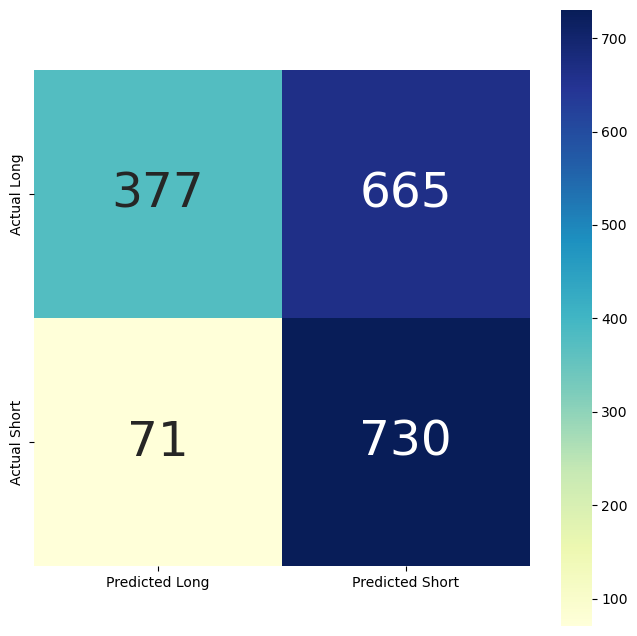

In [483]:
from sklearn.naive_bayes import BernoulliNB

bnb2 = BernoulliNB()
bnb2.fit(X_blsmote,y_blsmote)
y_pred_tfidf2_bnb = bnb2.predict(X_test_tfidf2)

# BernoulliNB & Kelime
cm12 = conf_matrix(y_test, y_pred_tfidf2_bnb)

In [484]:
results_tf = pd.DataFrame(list(zip(cm7, cm8, cm9, cm10, cm11, cm12)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR(Word)-TFIDF', 'LR(N-Grams)-TFIDF', 'MNB(Word)-TFIDF', 
                      'MNB(N-Grams)-TFIDF', 'BNB(Word)-TFIDF', 'BNB(N-Grams)-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV,LR(Word)-TFIDF,LR(N-Grams)-TFIDF,MNB(Word)-TFIDF,MNB(N-Grams)-TFIDF,BNB(Word)-TFIDF,BNB(N-Grams)-TFIDF
Accuracy,0.708627,0.707542,0.711883,0.706999,0.547477,0.711340,0.736842,0.741725,0.697775,0.730331,0.620727,0.600651
Precision,0.645374,0.650575,0.652370,0.706161,0.486894,0.713831,0.691748,0.727910,0.635556,0.711699,0.541531,0.523297
Recall,0.731586,0.706617,0.721598,0.558052,0.765293,0.560549,0.711610,0.647940,0.714107,0.637953,0.830212,0.911361
F1 Score,0.685781,0.677439,0.685240,0.623431,0.595146,0.627972,0.701538,0.685601,0.672546,0.672811,0.655495,0.664845


In [485]:
## correct yapmadan ki çalışmalarda rare kelime silmek daha iyi sonuç vermedi diyebiliriz, ama cok farkeden bir durum olmadı yine de yakındılar